# ***Predicting the age of abalone from physical measurements***


## ***ABSTRACT***
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

In [4]:
!pip install shap

# Importing necessary packages
import xgboost as xgb
import shap
import pandas as pd
from sklearn.model_selection import train_test_split

# Loading the abalone dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
columns = ["Sex", "Length", "Diameter", "Height", "WholeWeight",
		"ShuckedWeight", "VisceraWeight", "ShellWeight", "Rings"]
abalone_data = pd.read_csv(url, header=None, names=columns)

# Data preprocessing and feature engineering
# Assuming you want to predict the number of rings, which is a continuous target variable
X = abalone_data.drop("Rings", axis=1)
y = abalone_data["Rings"]

# Convert categorical feature 'Sex' to numerical using one-hot encoding
X = pd.get_dummies(X, columns=["Sex"], drop_first=True)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(
	X, y, test_size=0.2, random_state=42)

# Creating an XGBRegressor model
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# Save the XGBoost model in binary format
model.save_model('model.json')

# Load the model from the saved binary file
loaded_model = xgb.XGBRegressor()
loaded_model.load_model('model.json')

# SHAP Explainer
explainer = shap.Explainer(loaded_model)
shap_values = explainer(X_test)

# Initialize the SHAP JavaScript library
shap.initjs()



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 8.6 MB/s eta 0:00:00


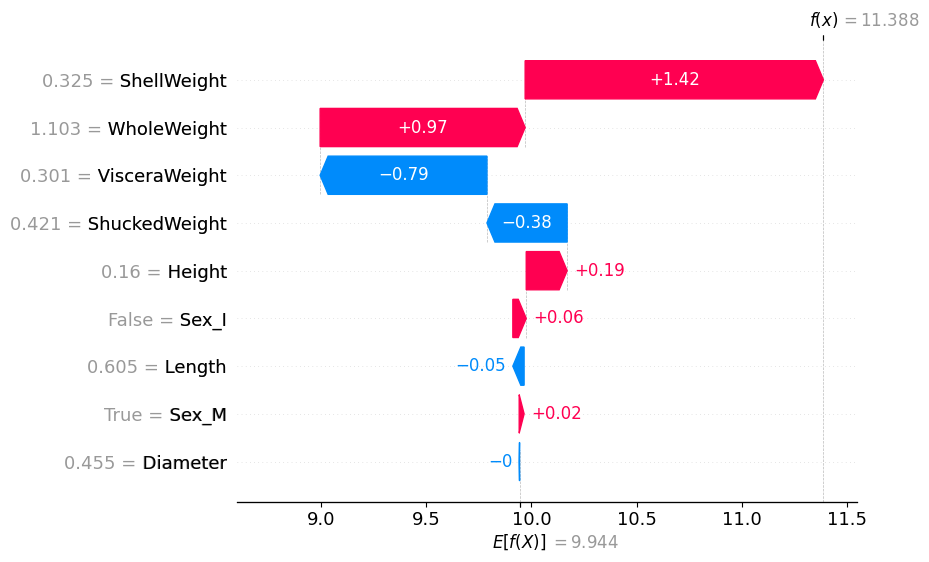

In [5]:
# Load the model from the saved binary file
loaded_model = xgb.XGBRegressor()
loaded_model.load_model('model.json')

# SHAP Explainer
explainer = shap.Explainer(loaded_model)
shap_values = explainer(X_test)

# Waterfall plot for the first observation
shap.waterfall_plot(shap_values[0])


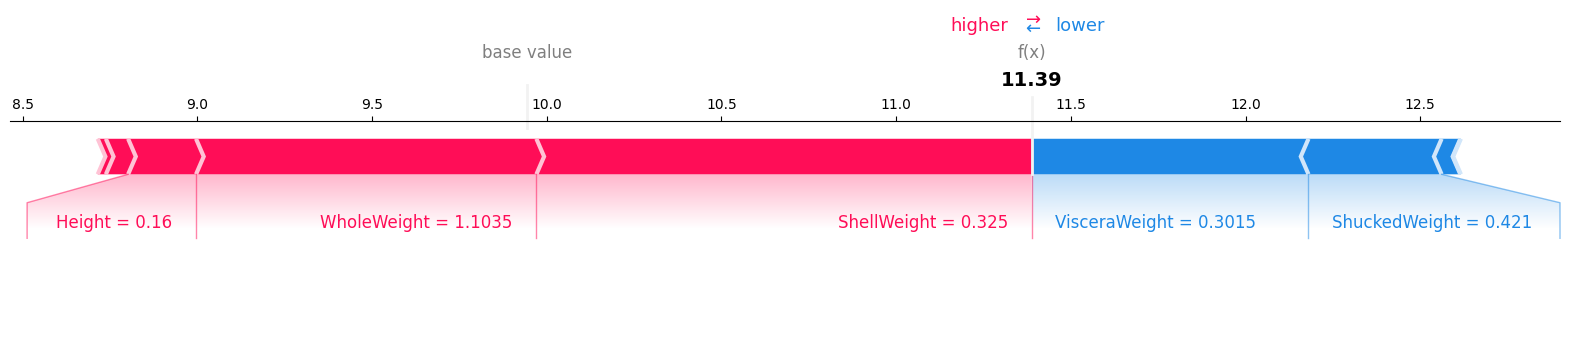

In [6]:
# Create a SHAP explainer for the model
explainer = shap.Explainer(model)

# Compute SHAP values for the test set
shap_values = explainer(X_test)

# If SHAP values are an Explanation object, extract the values
if isinstance(shap_values, shap.Explanation):
	shap_values = shap_values.values

# Force plot for the first observation with matplotlib
# The expected_value is the model's expected output for the dataset
# The shap_values[0] represents the SHAP values for the first observation
# X_test.iloc[0, :] is the corresponding feature values for the first observation
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0, :], matplotlib=True)


**Color Coding:** Similar to the waterfall plot, with red indicating positive contributions and blue indicating negative ones.

**Stacked Force Plot:**
It Extends the force plot concept to visualize explanations for an entire dataset.
It Allows stacking force plots for multiple predictions, providing an overview of feature contributions across various instances.
It is useful for identifying patterns and trends in feature contributions across a dataset.

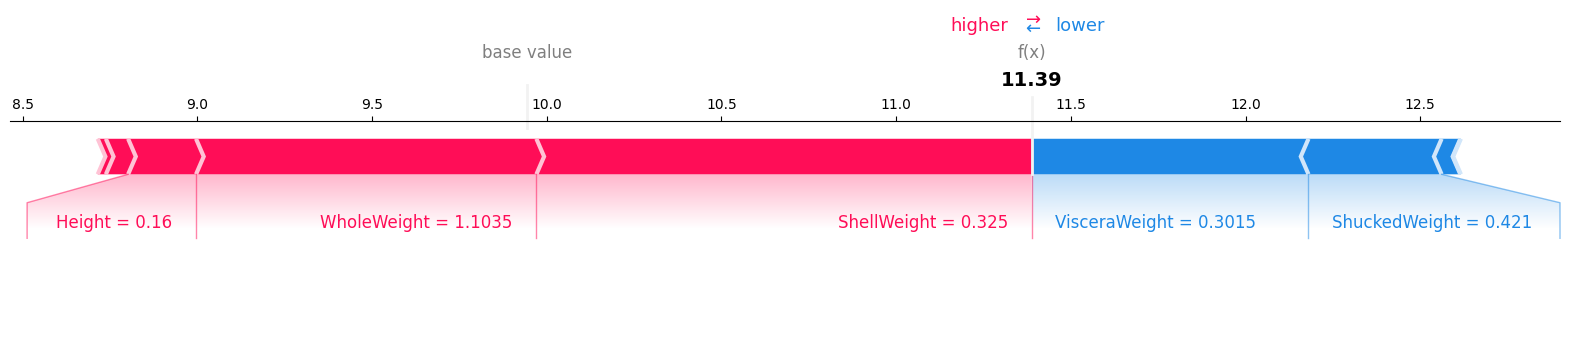

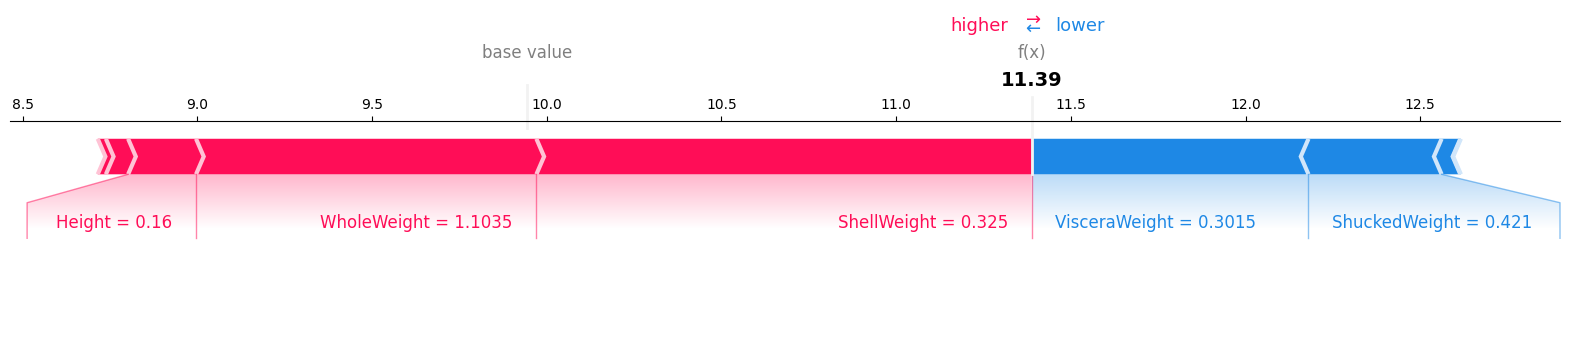

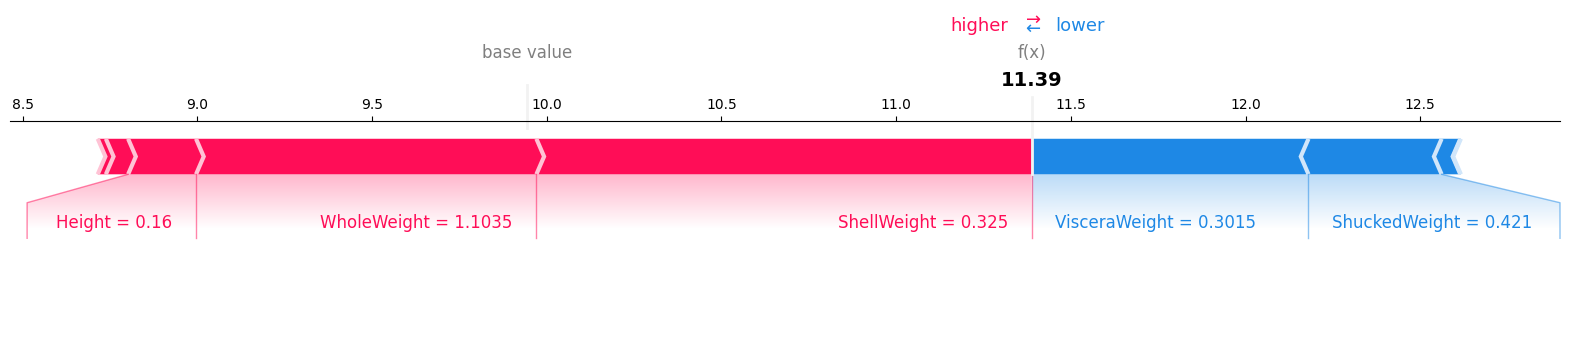

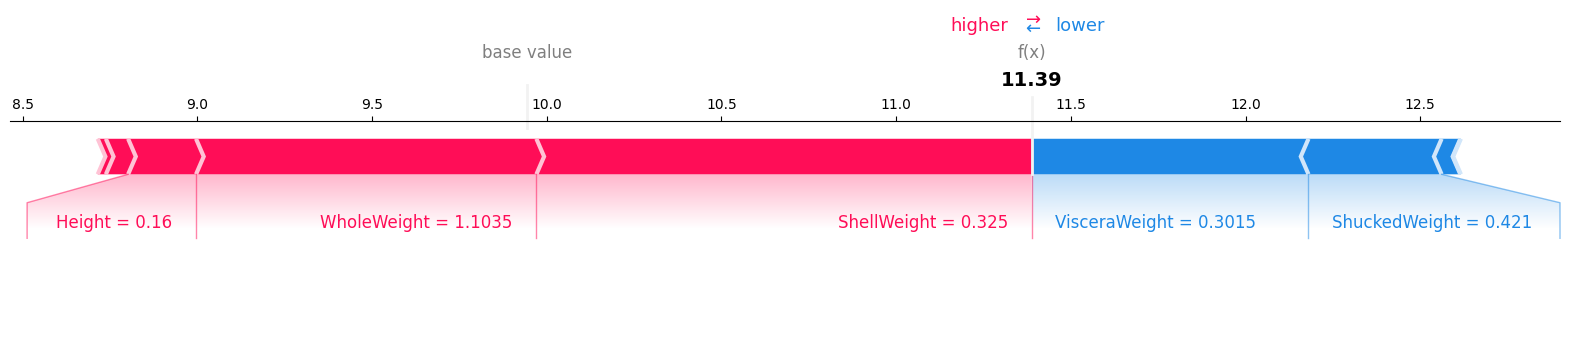

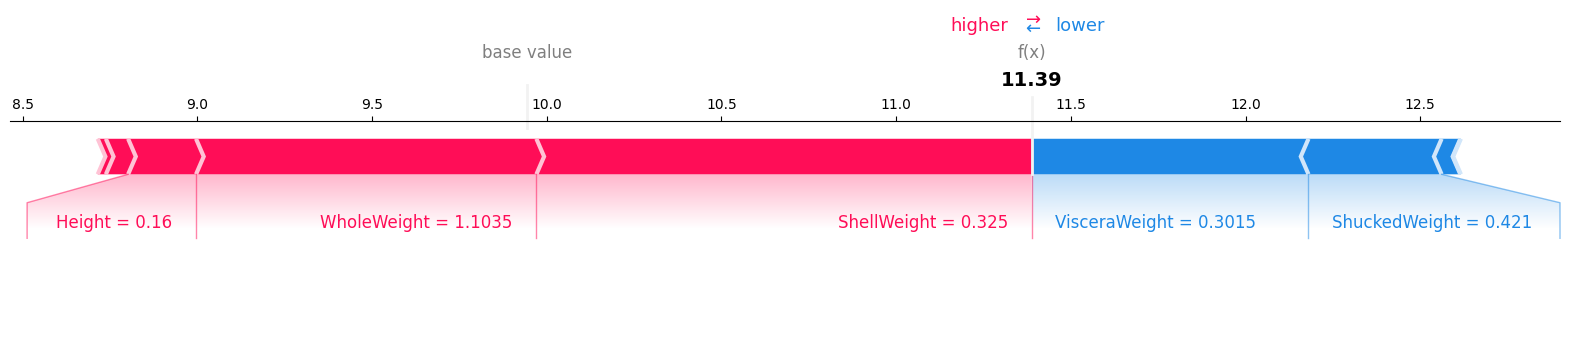

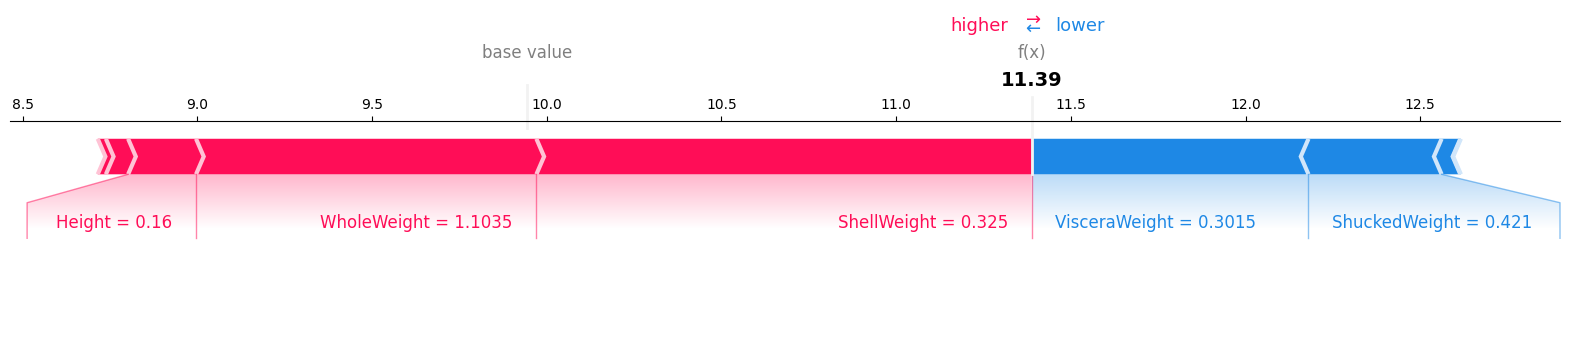

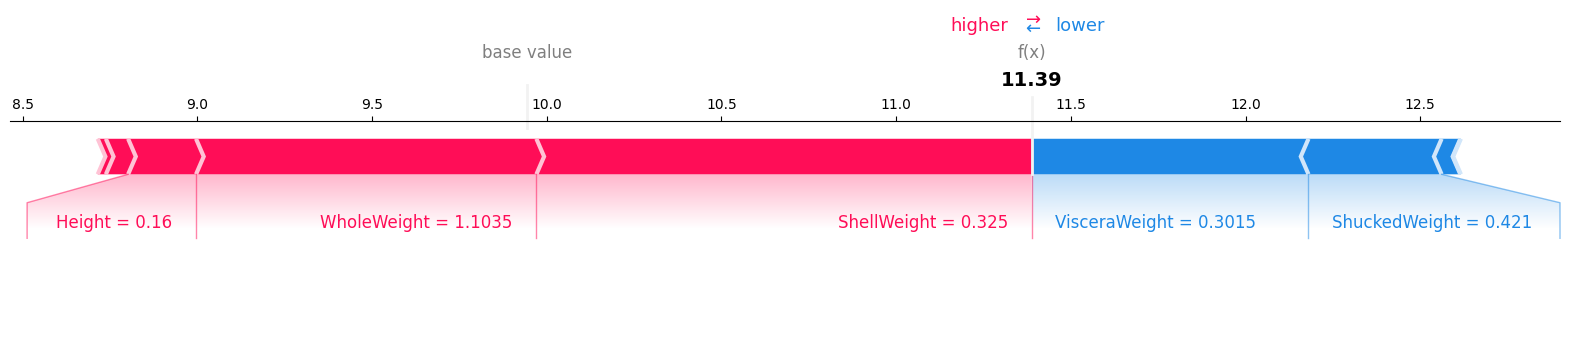

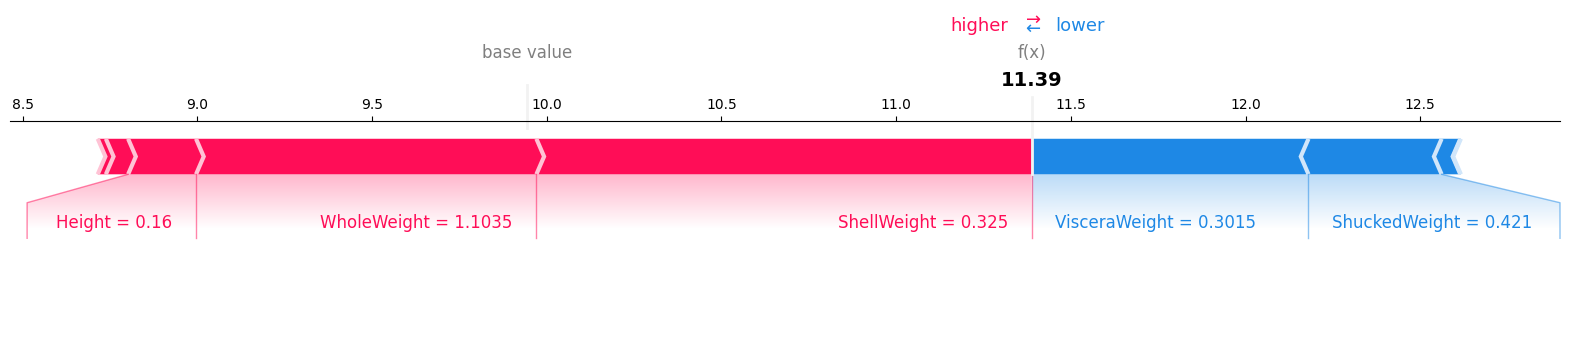

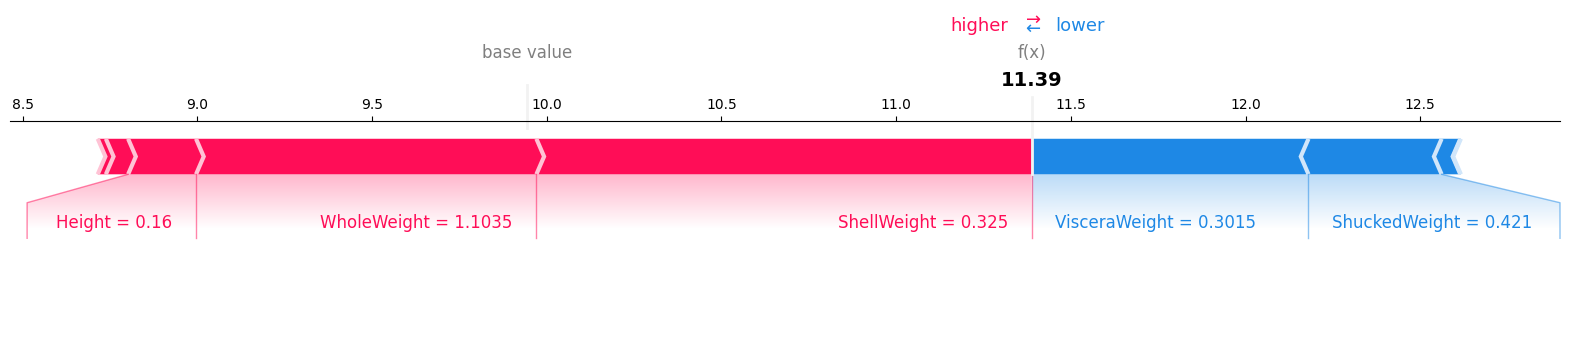

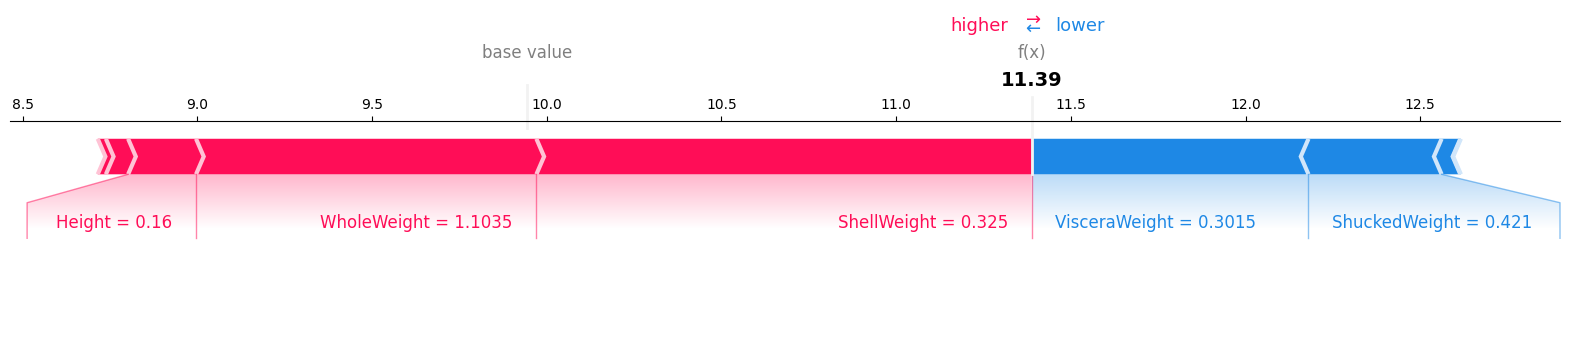

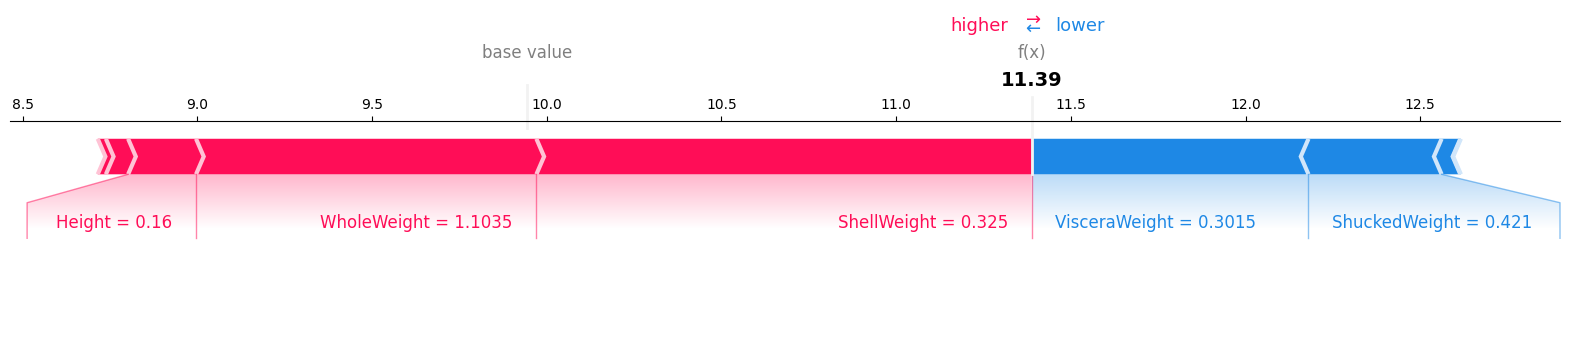

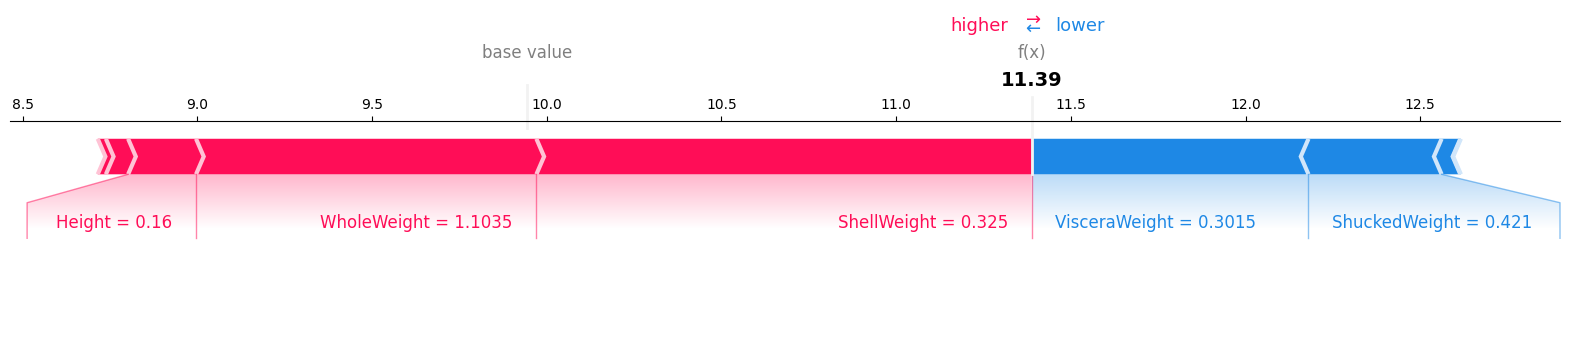

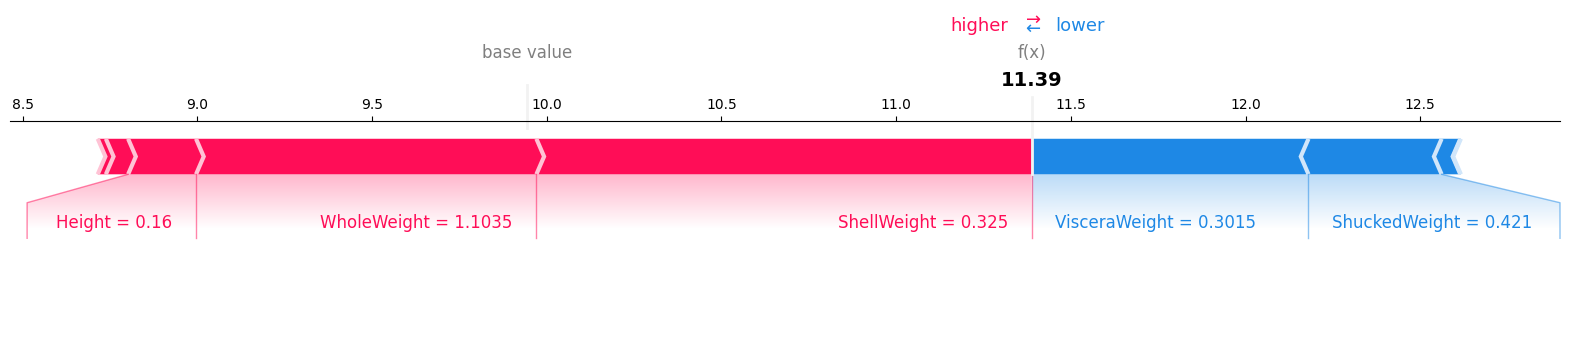

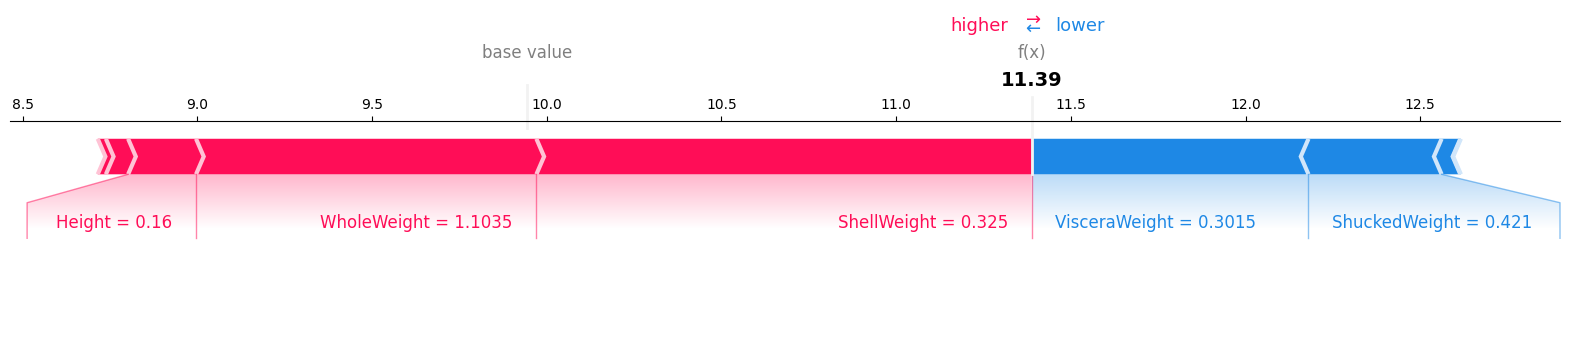

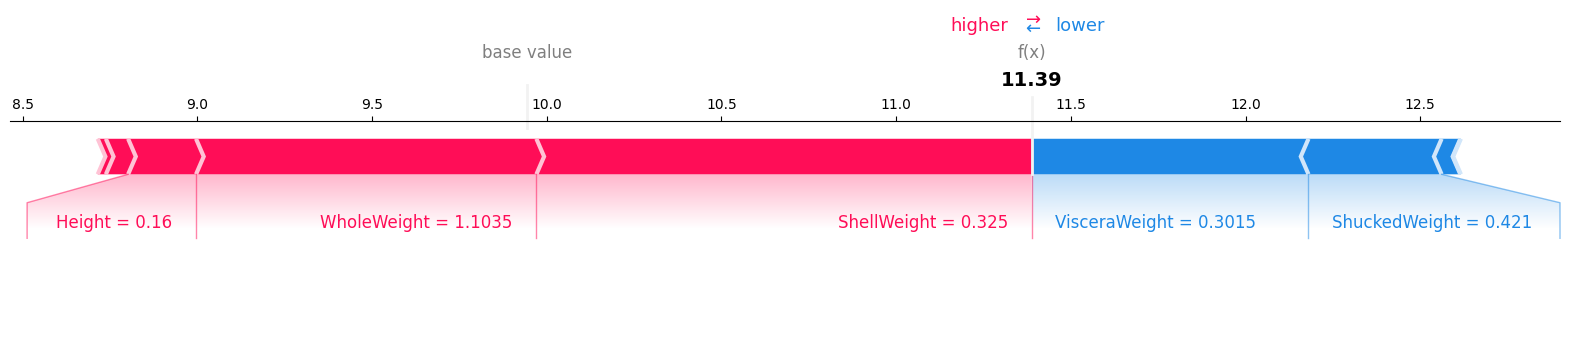

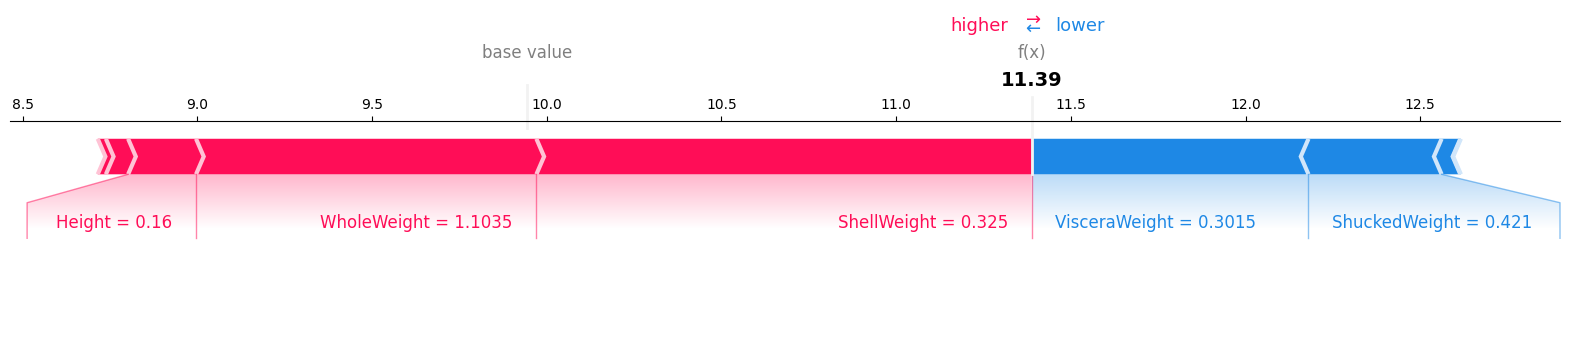

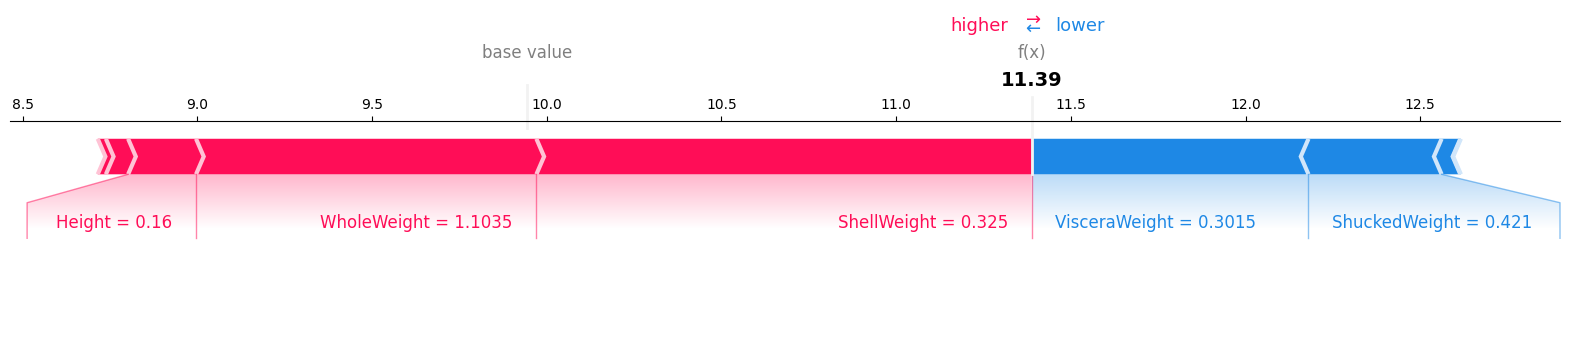

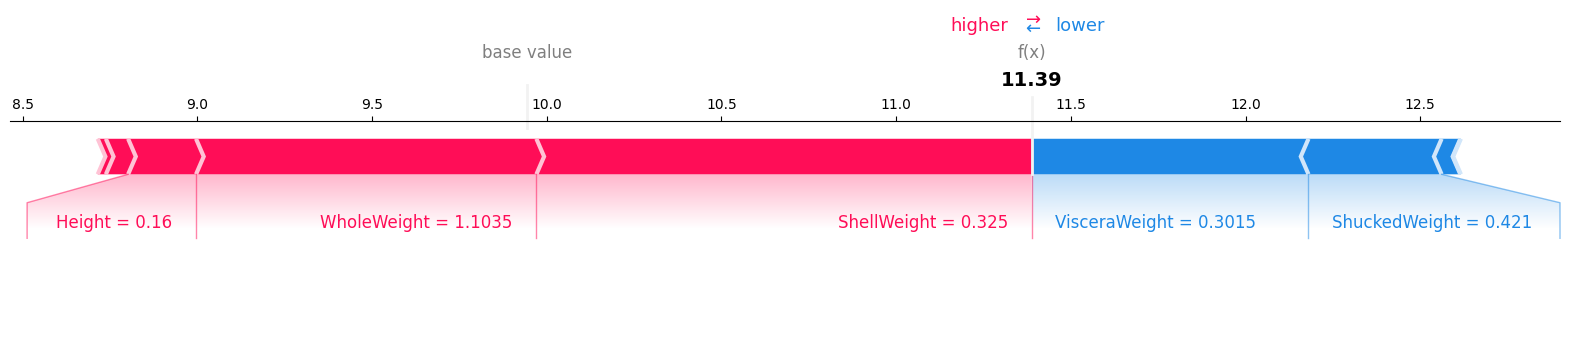

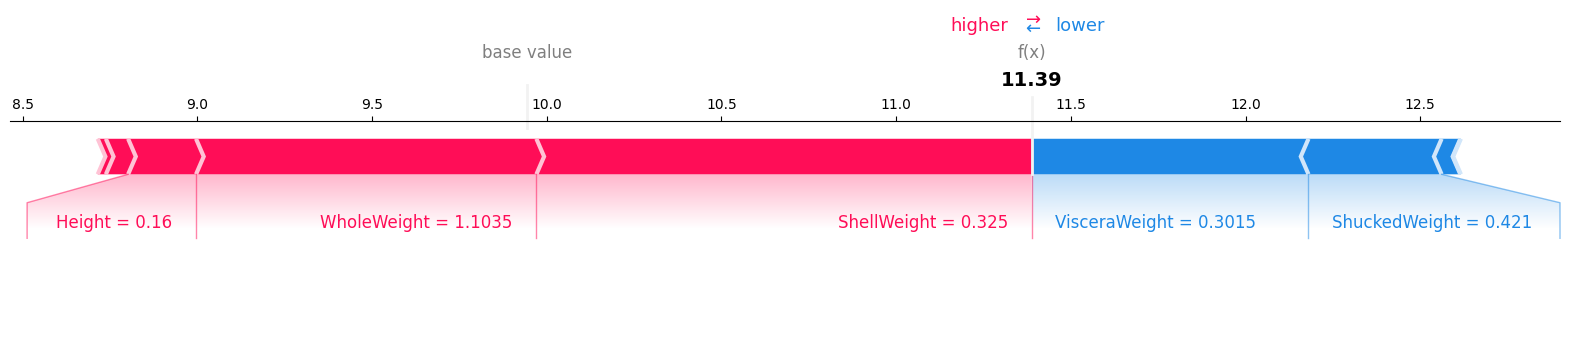

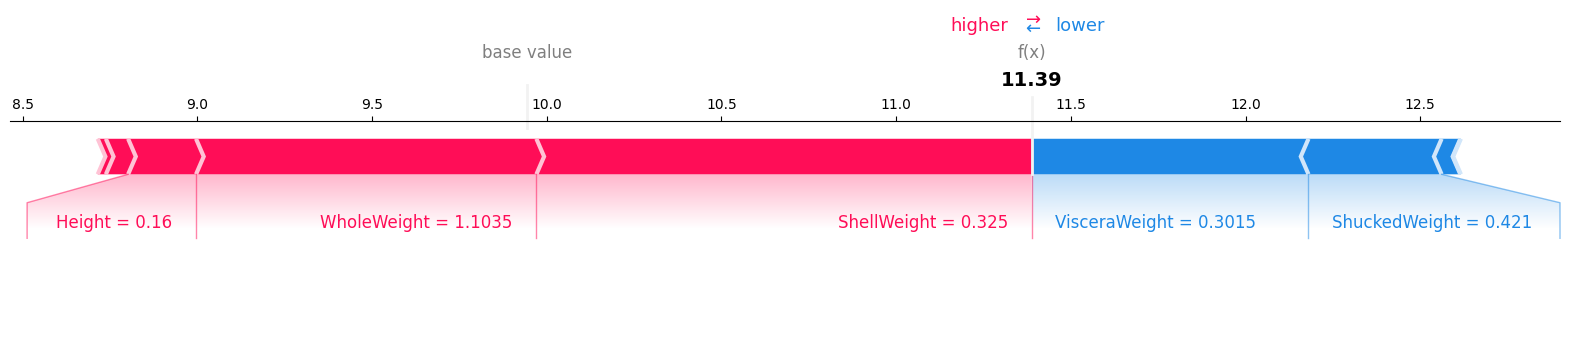

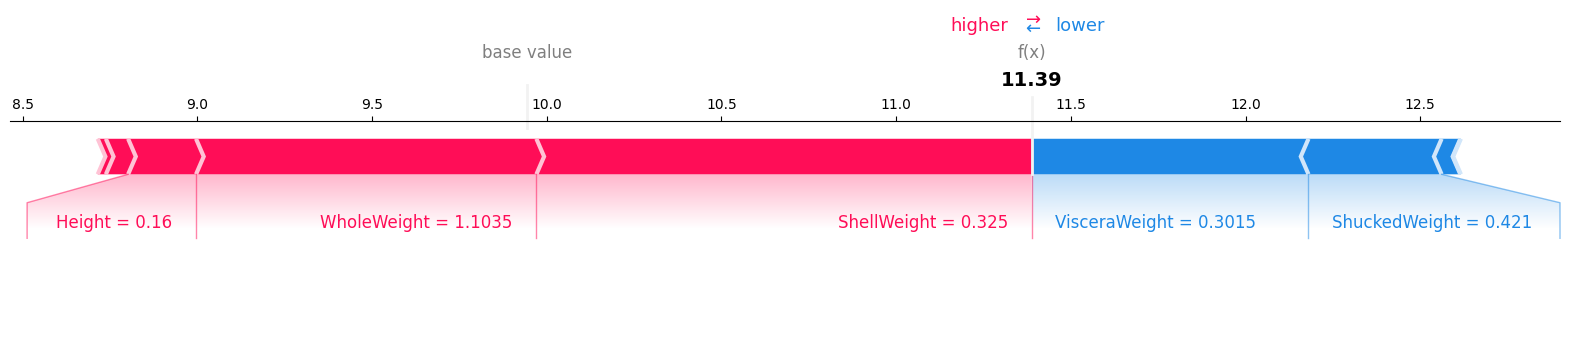

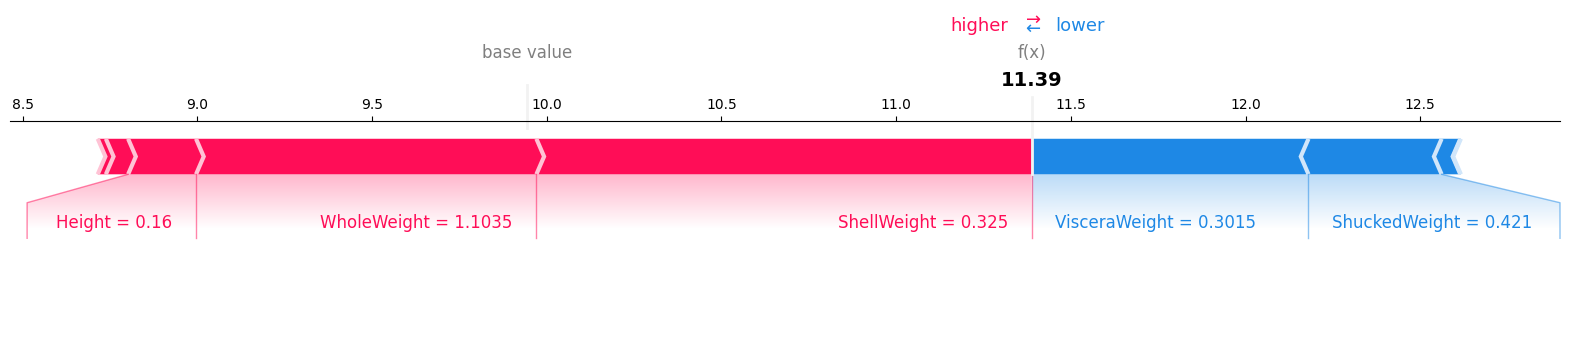

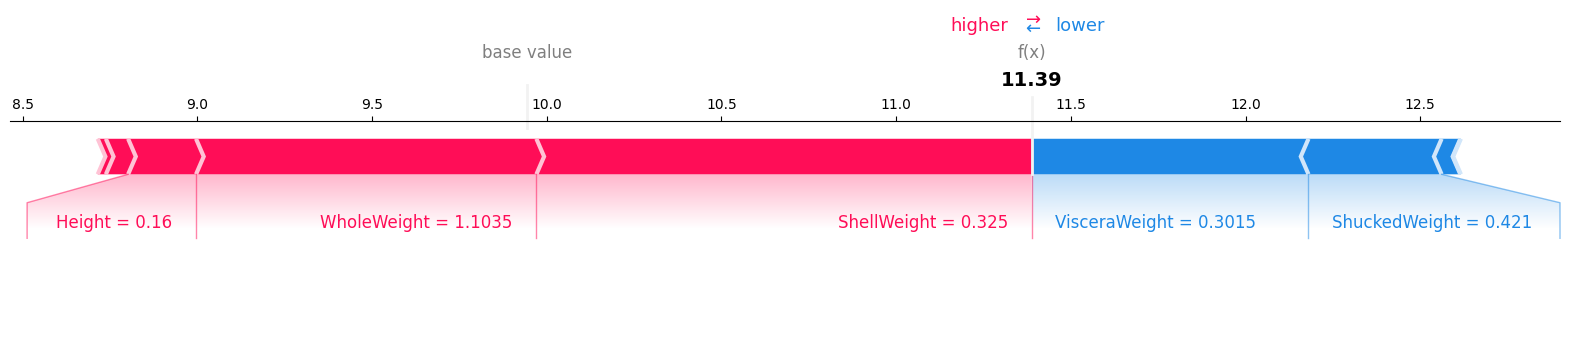

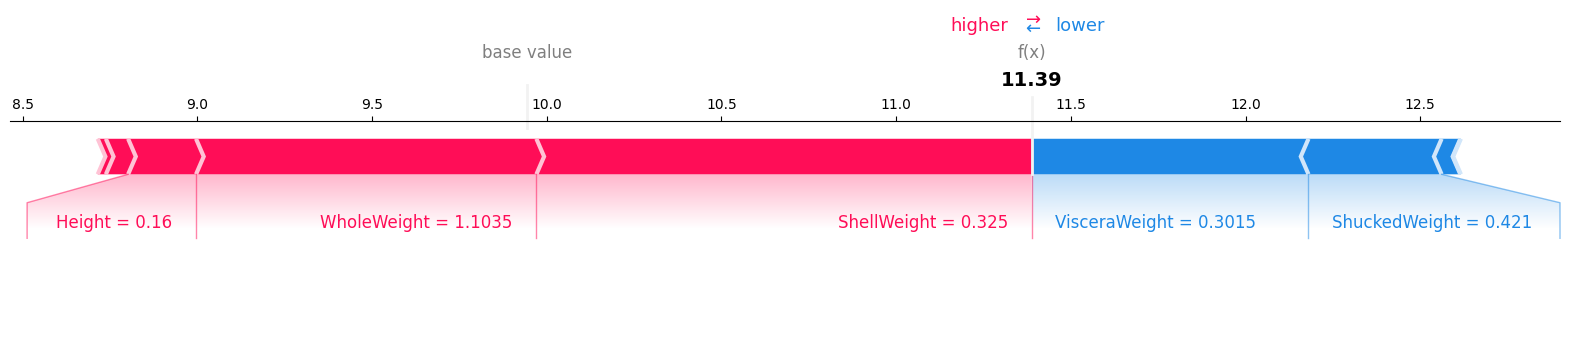

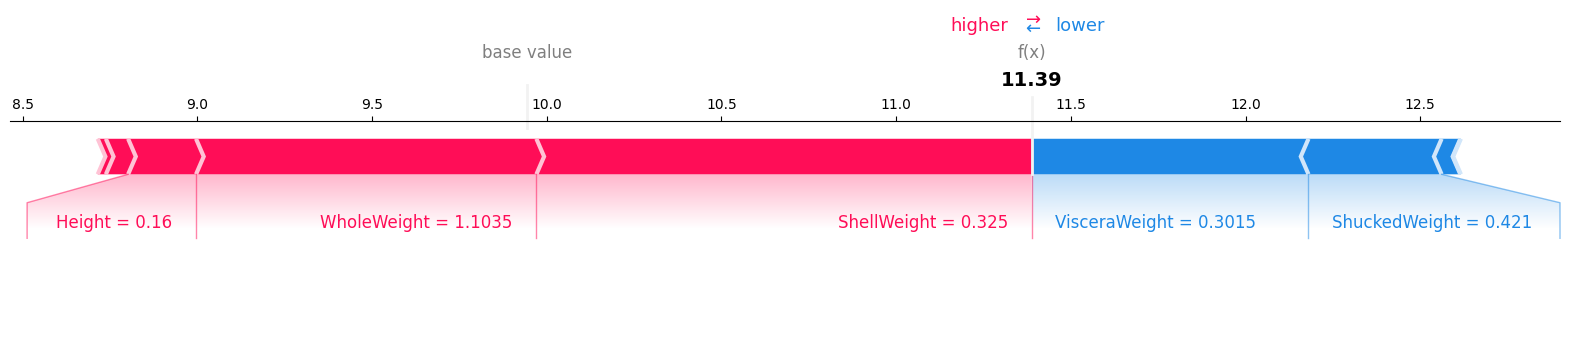

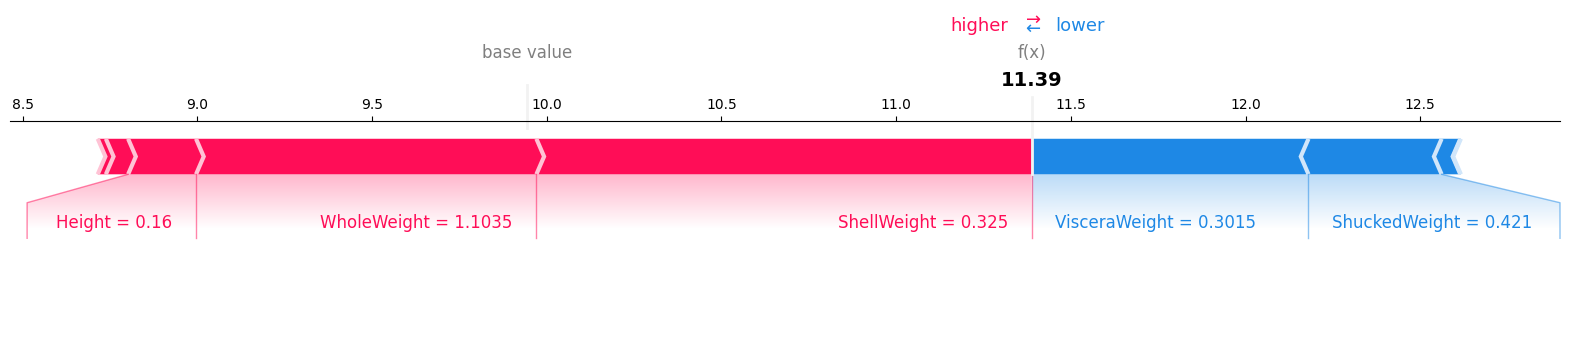

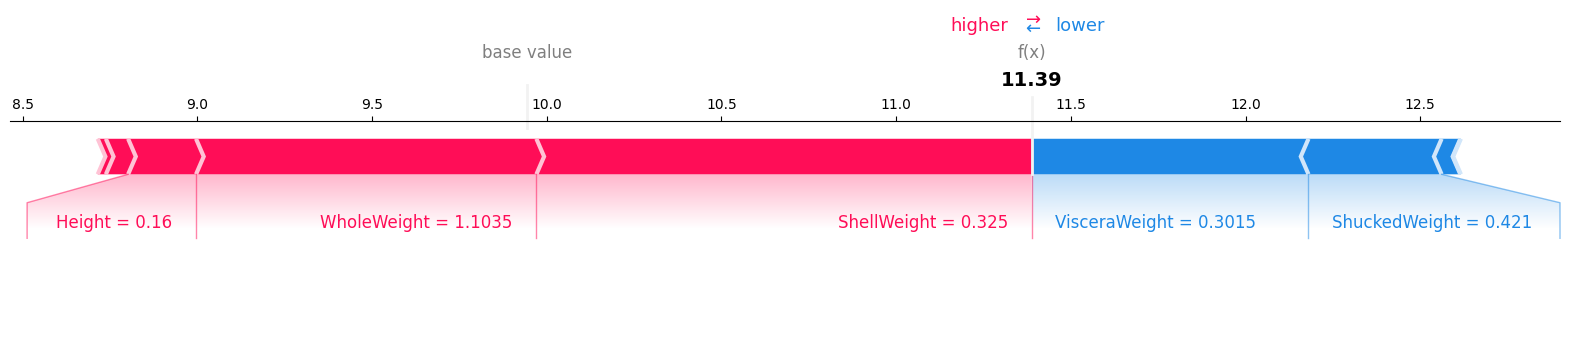

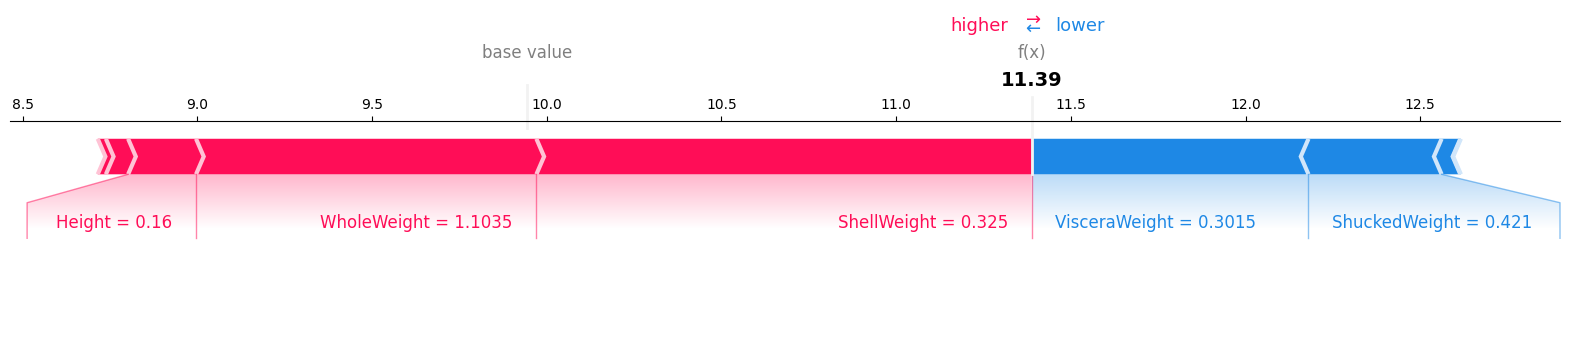

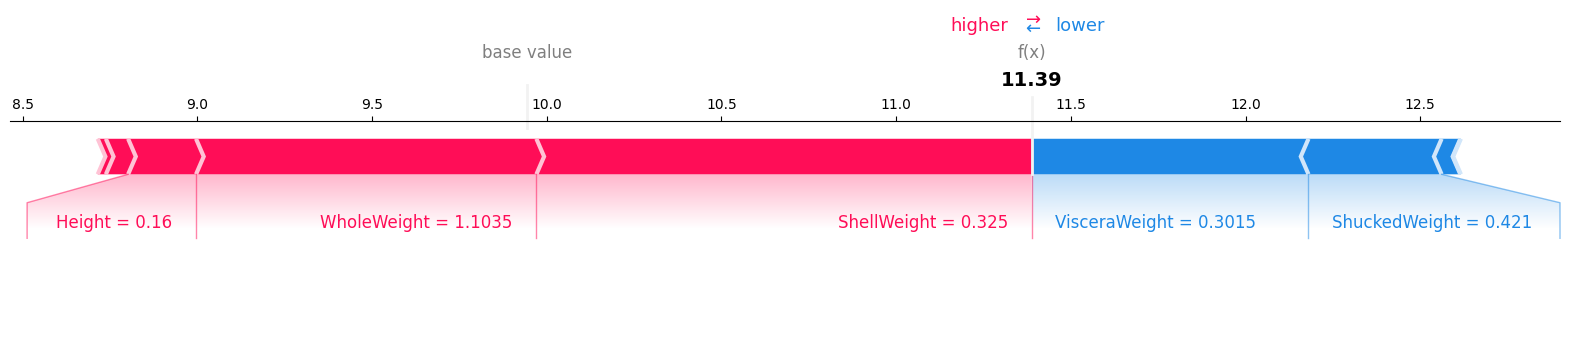

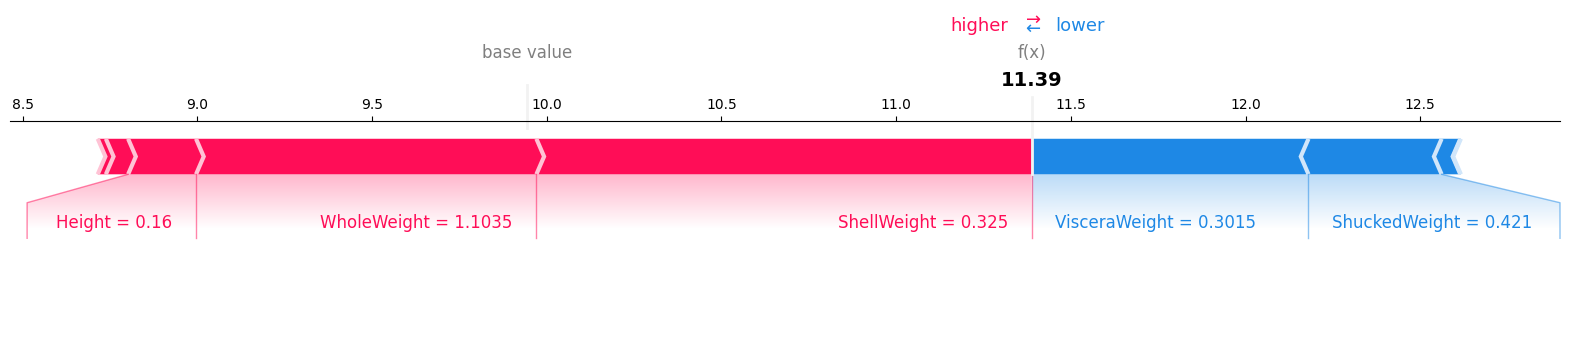

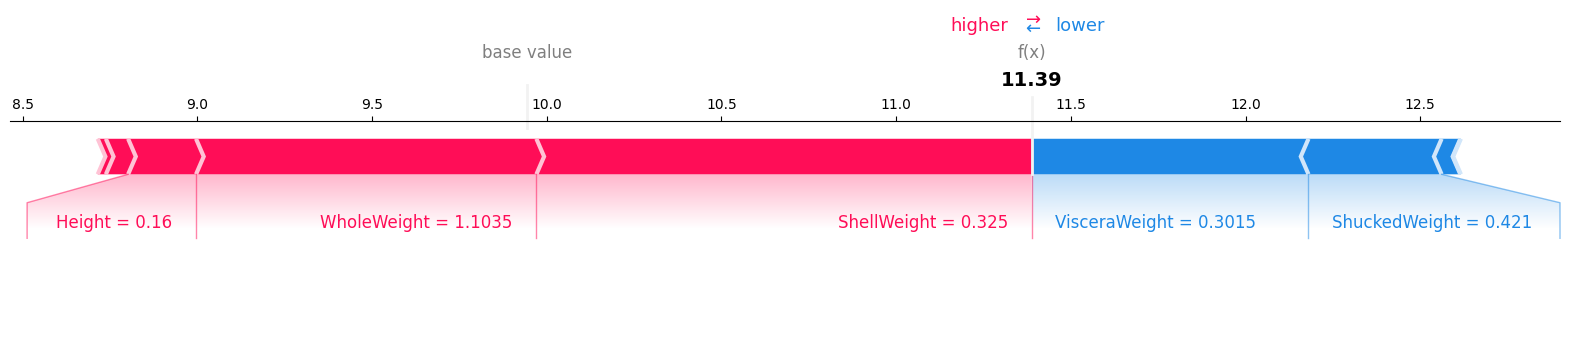

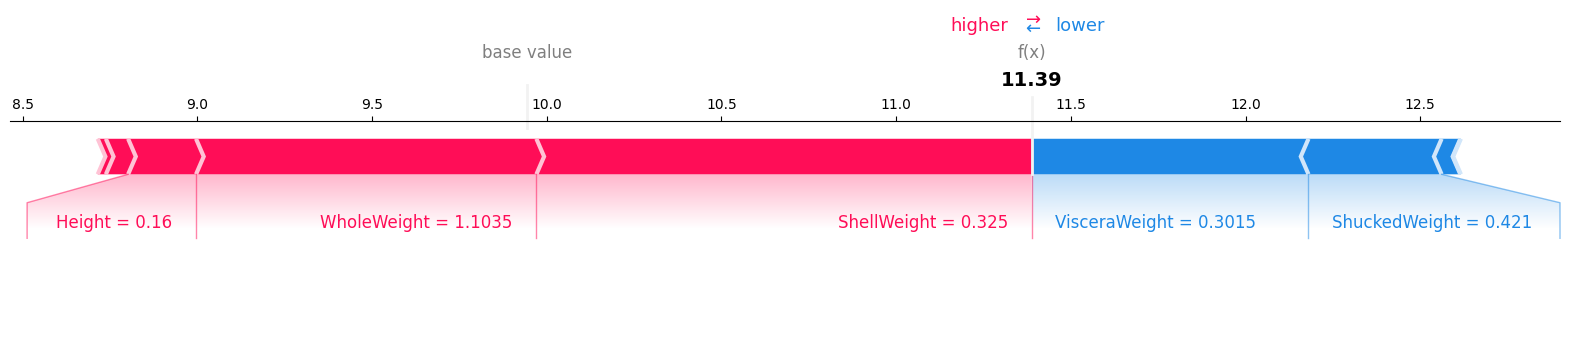

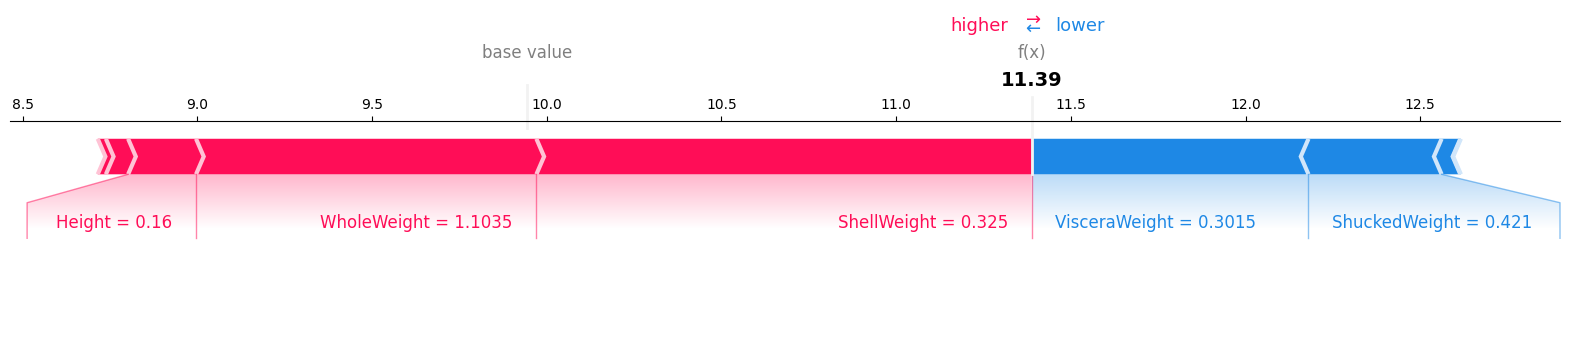

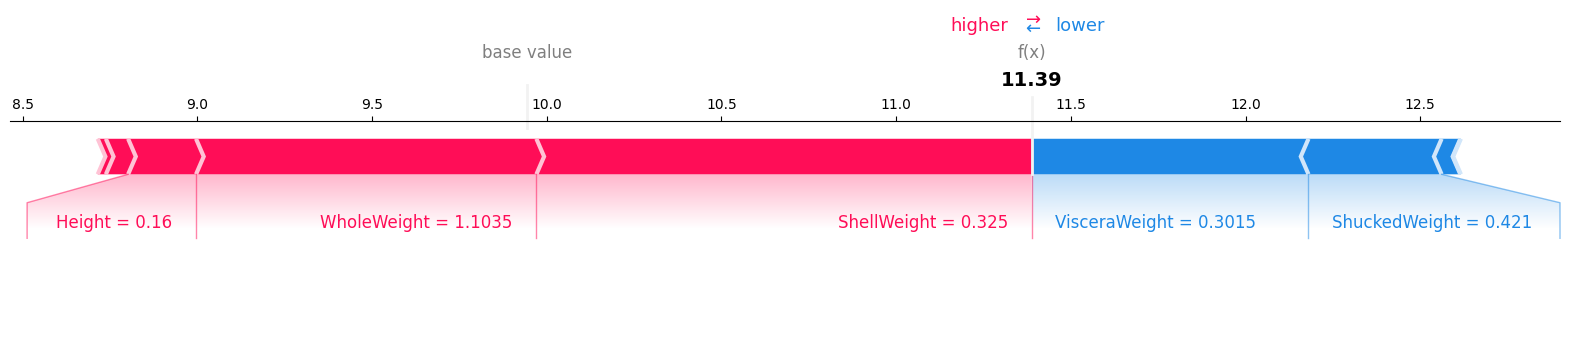

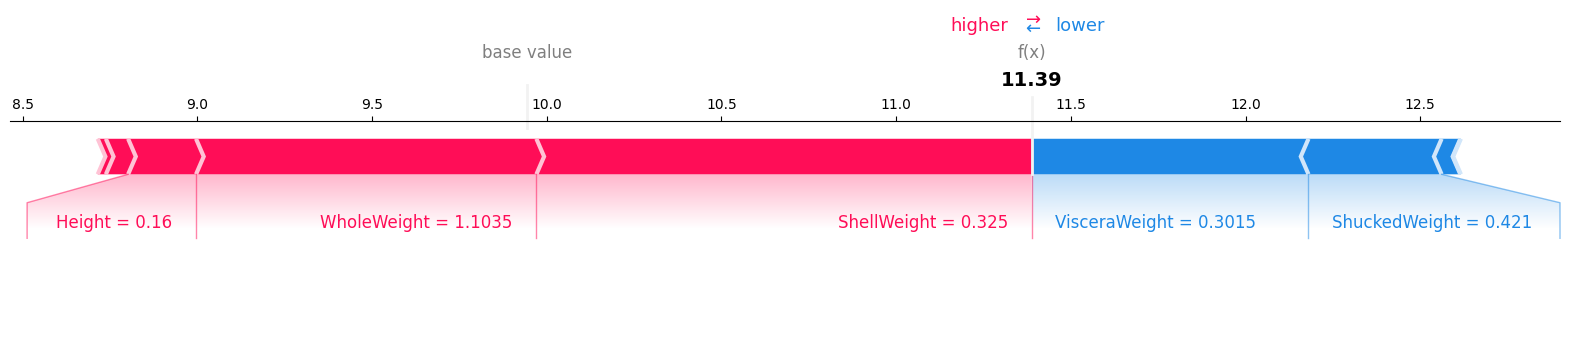

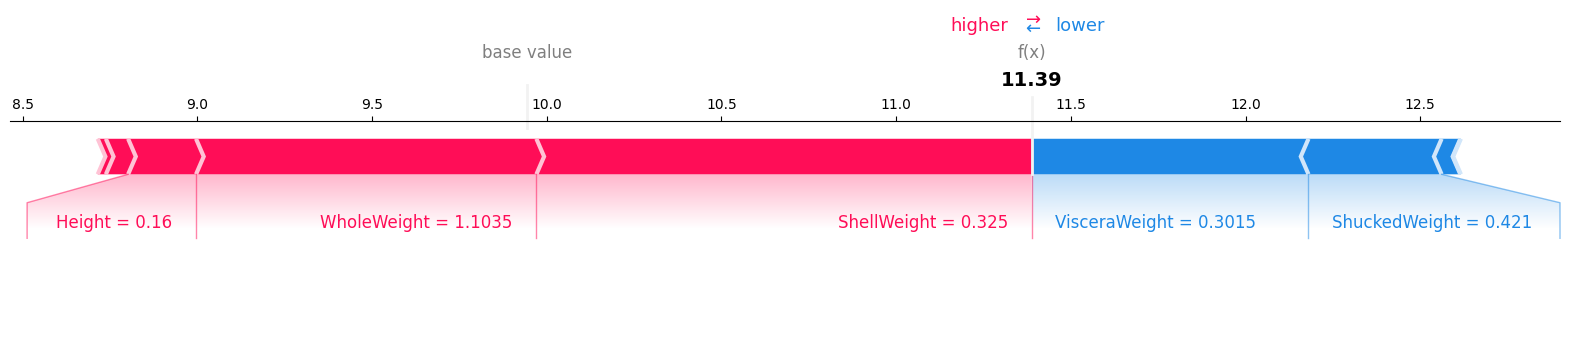

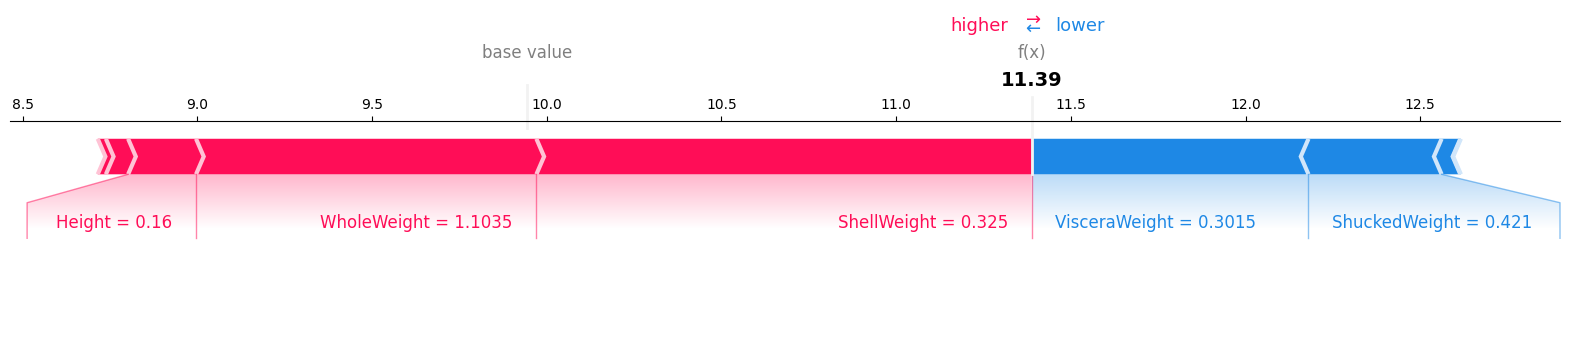

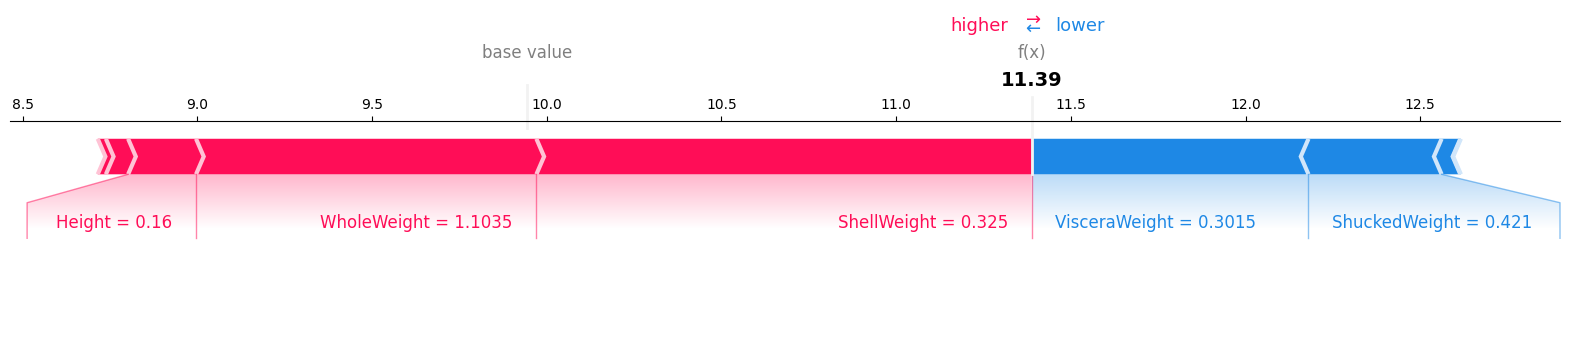

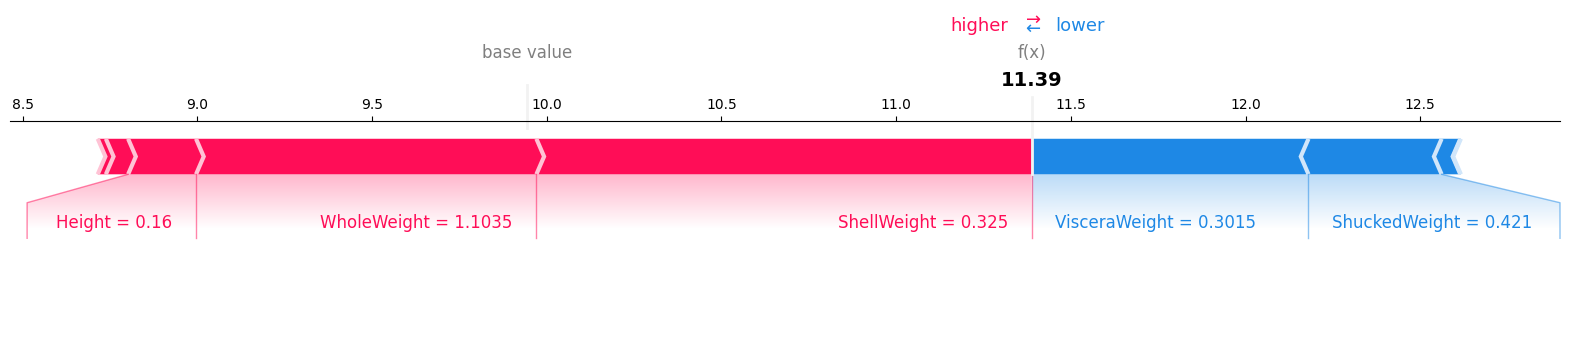

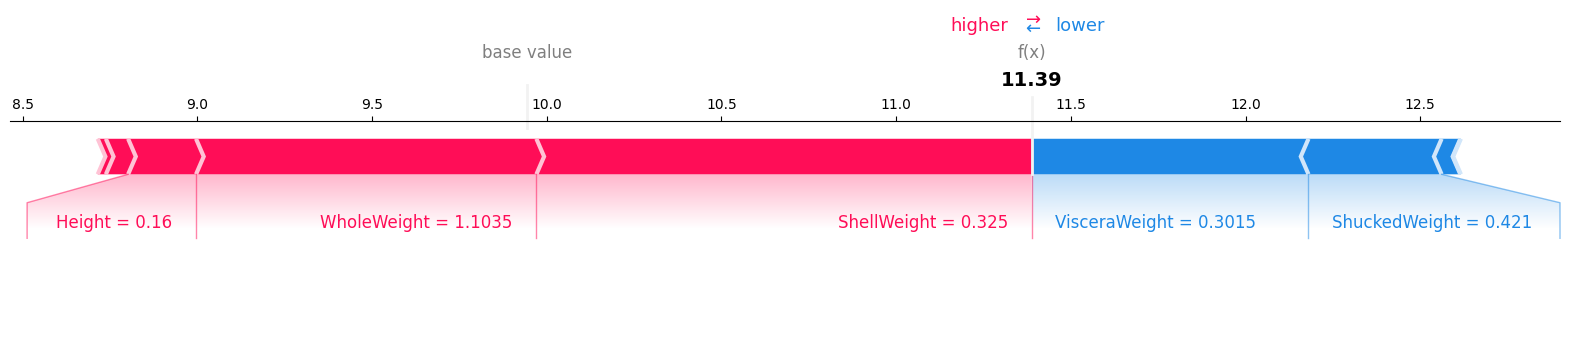

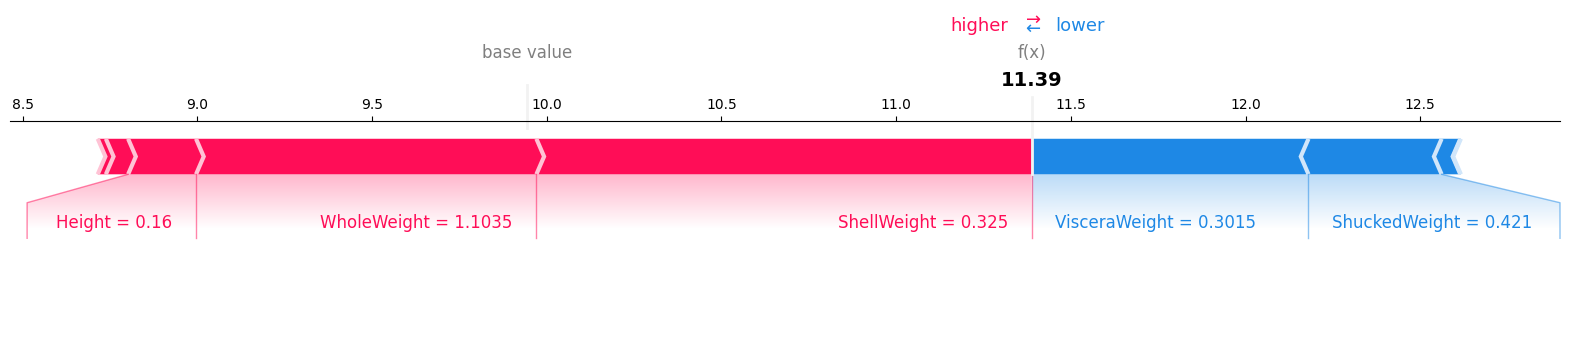

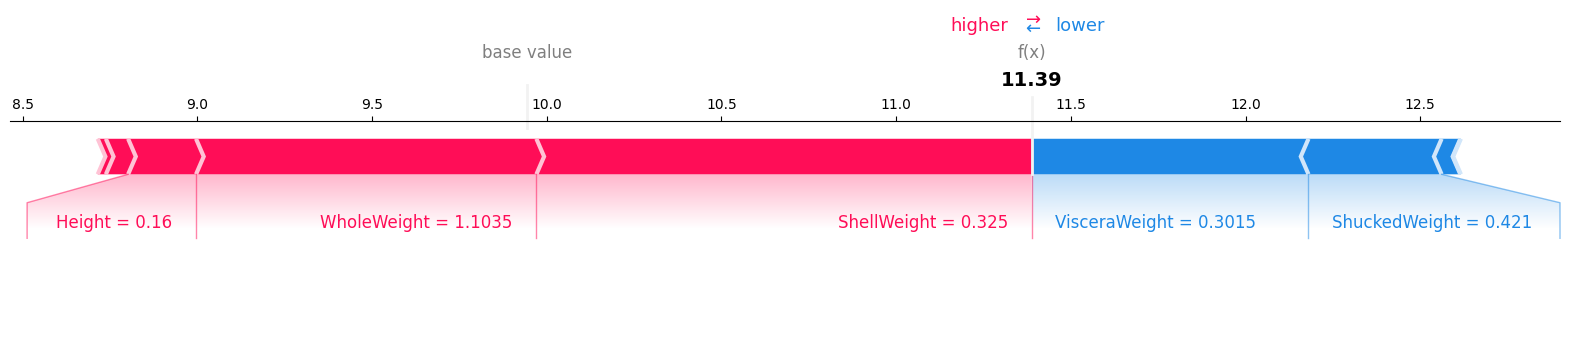

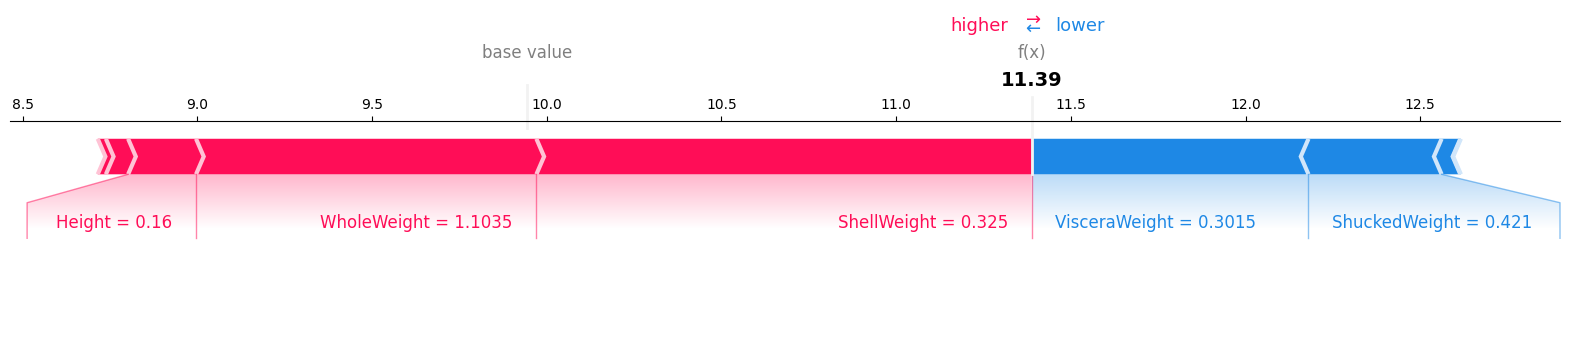

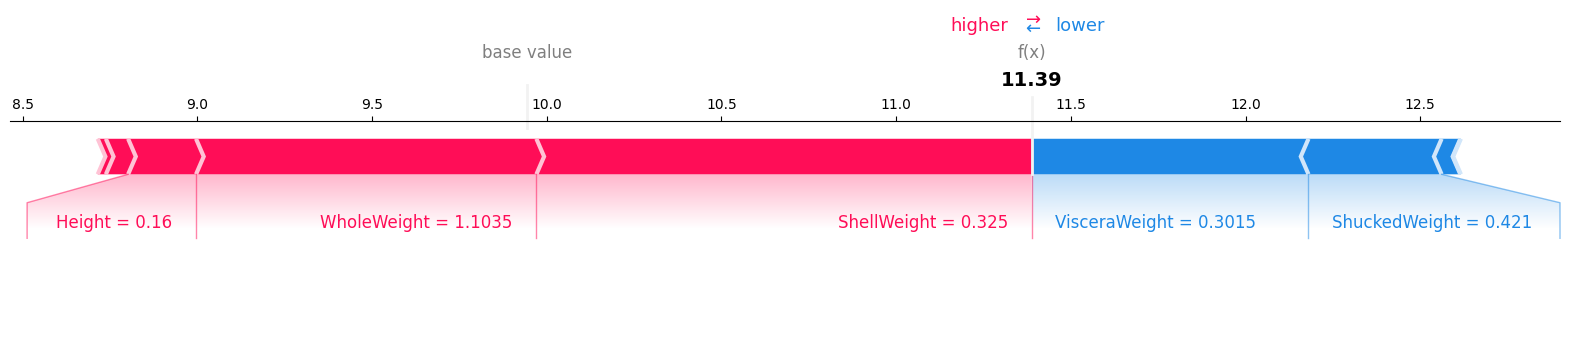

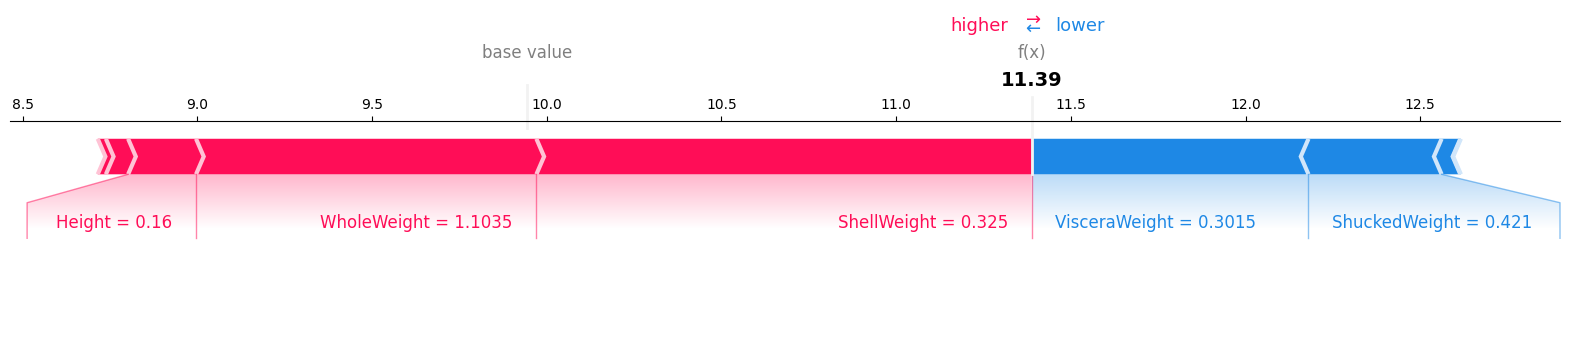

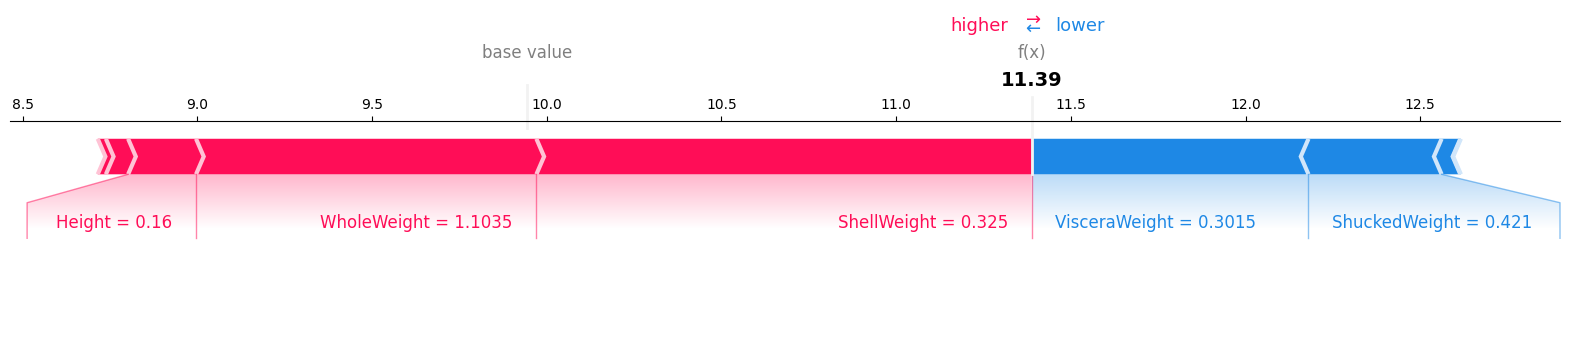

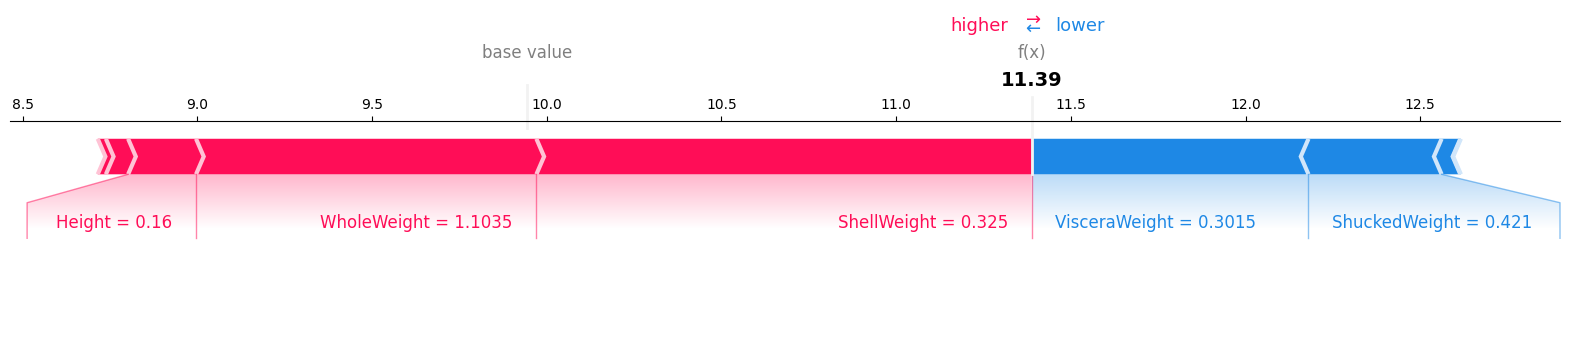

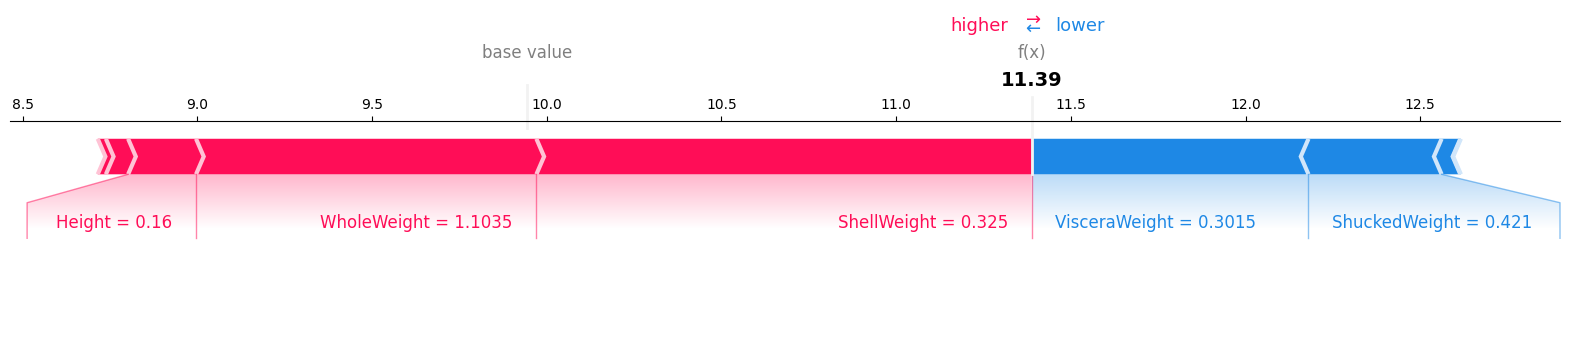

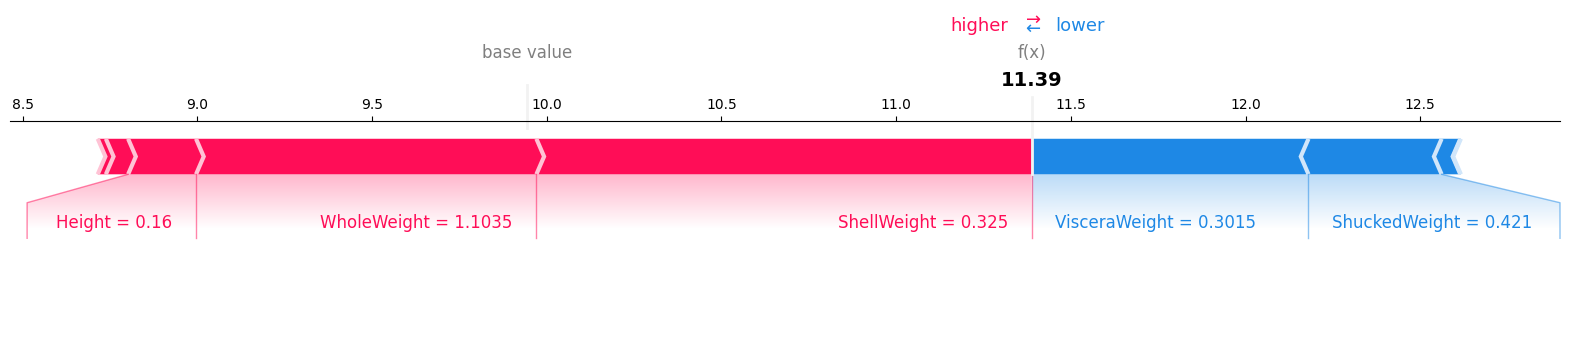

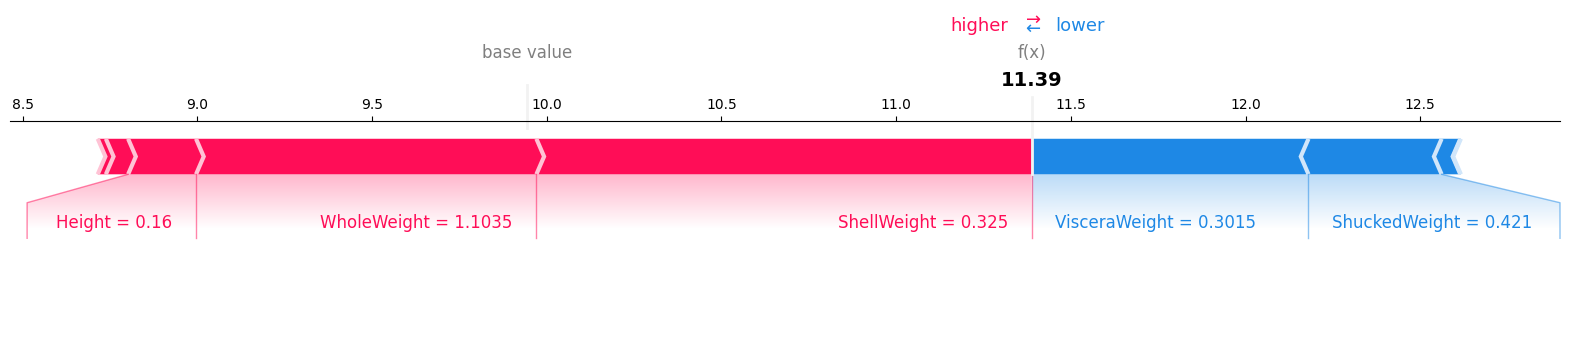

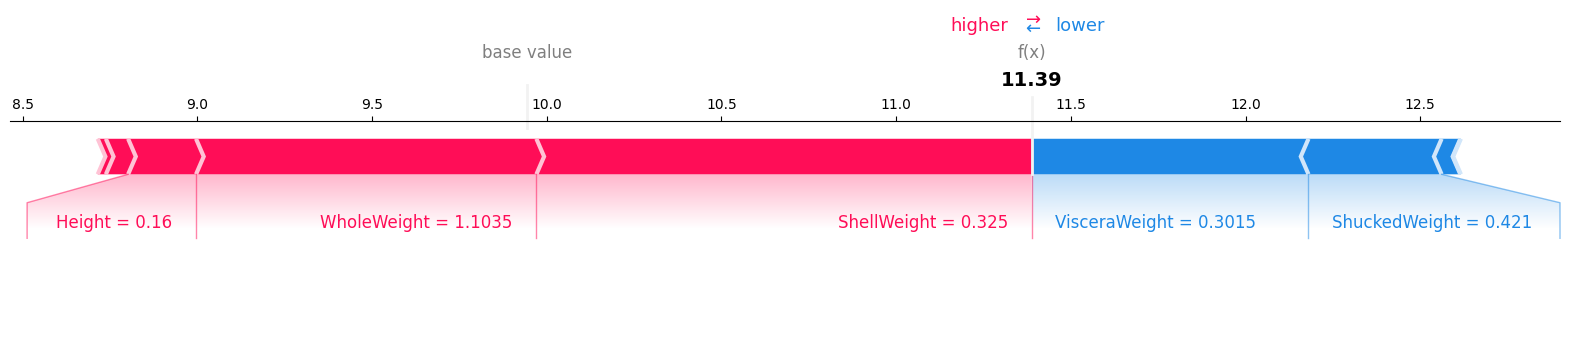

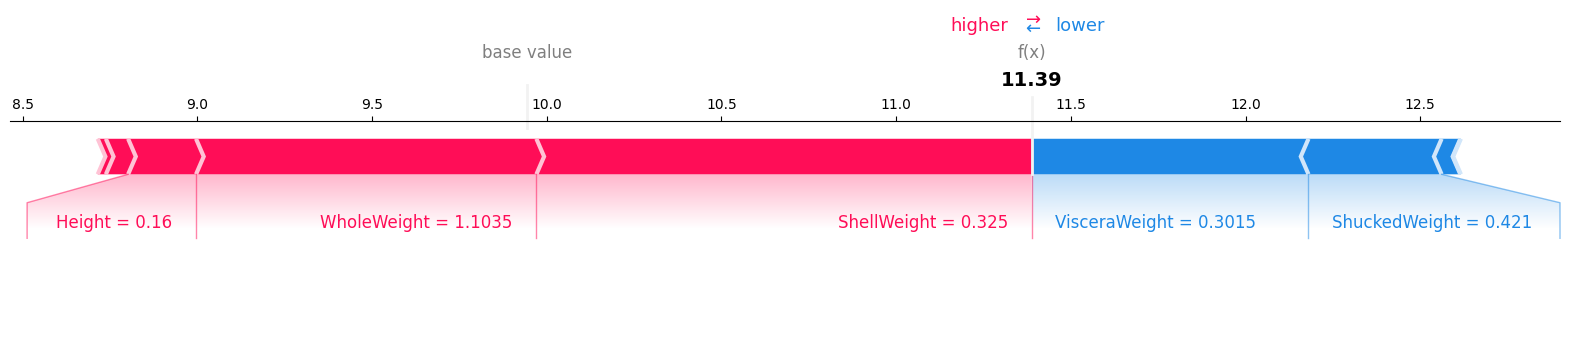

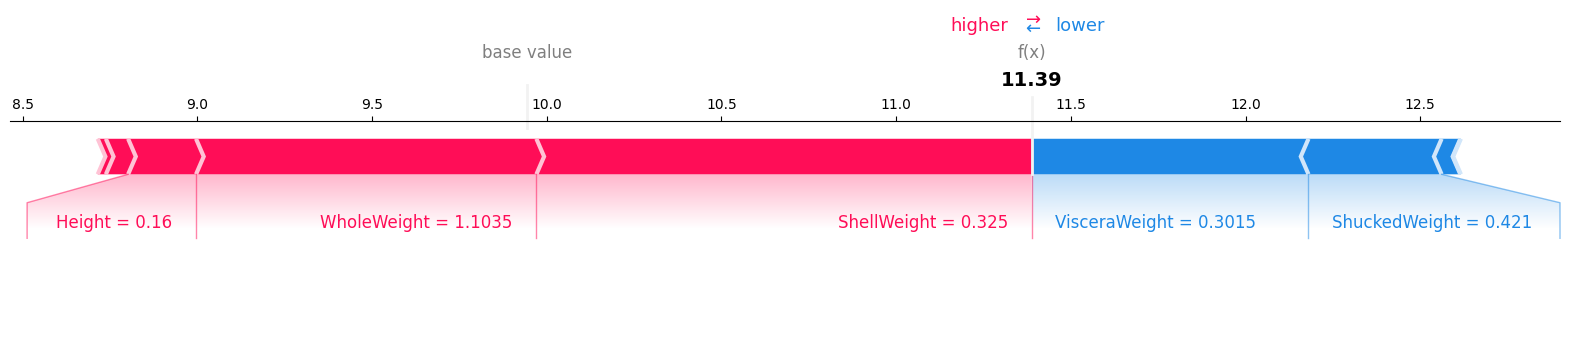

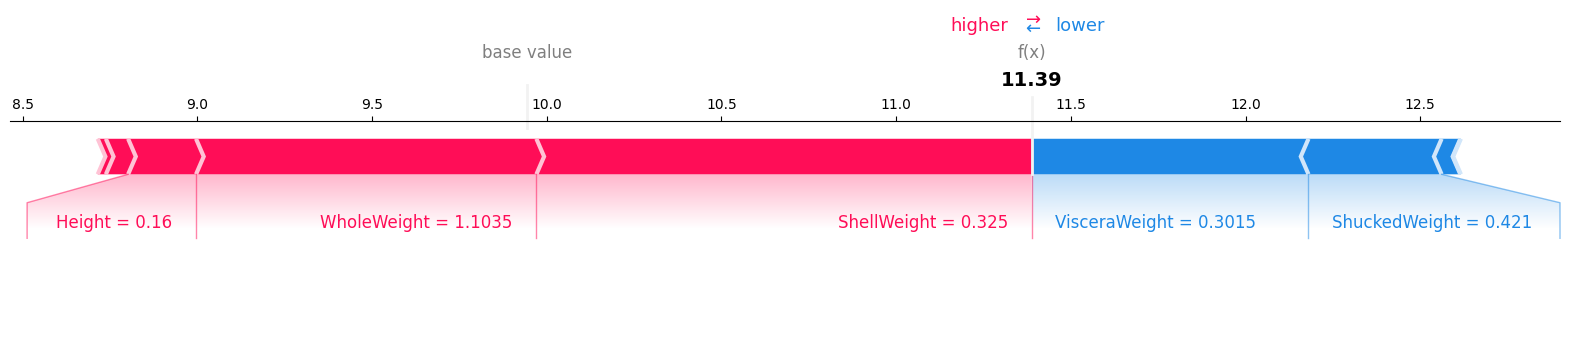

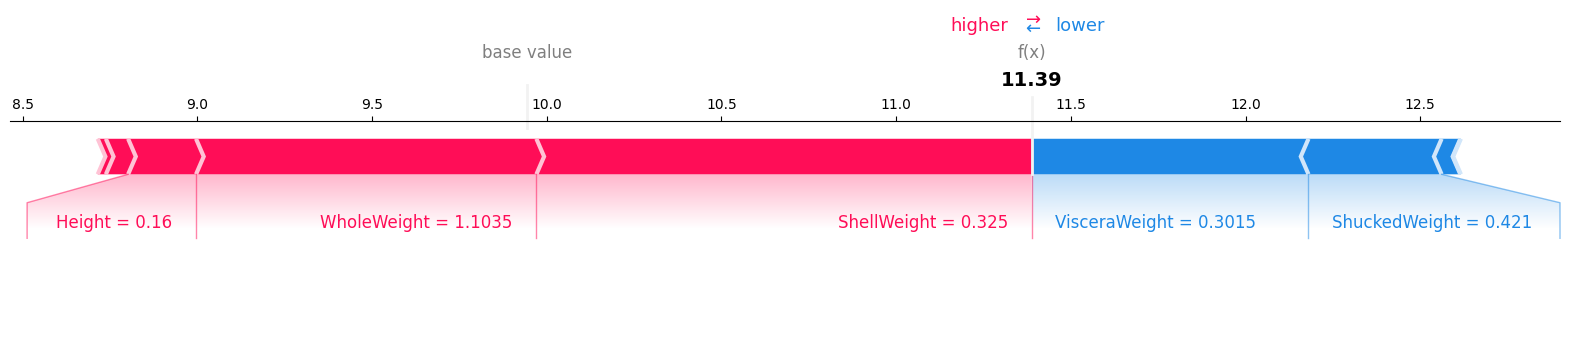

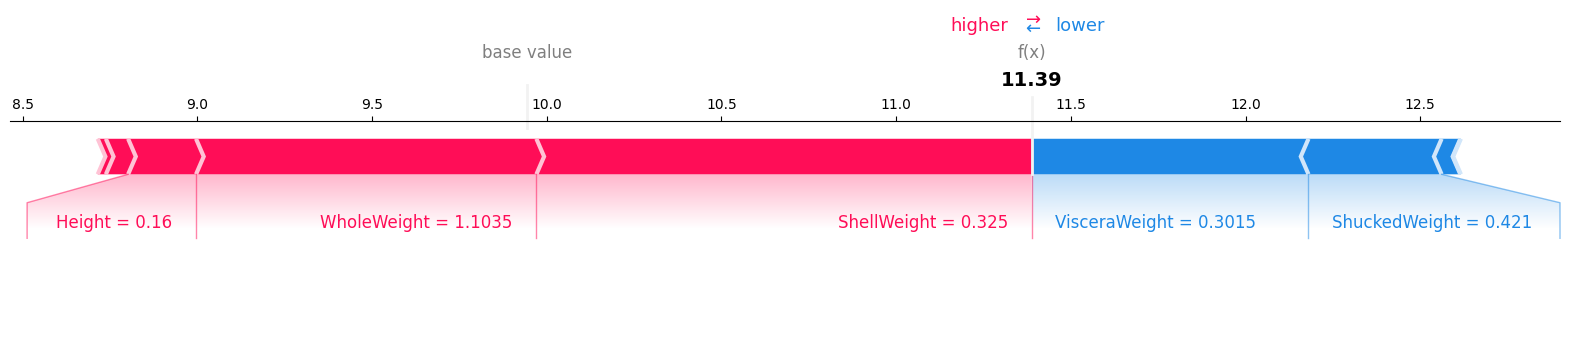

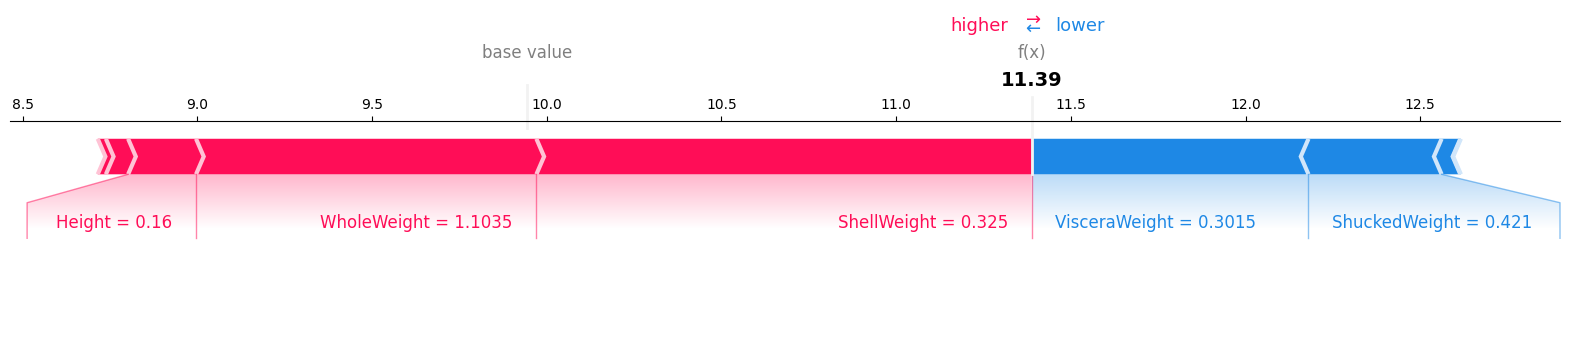

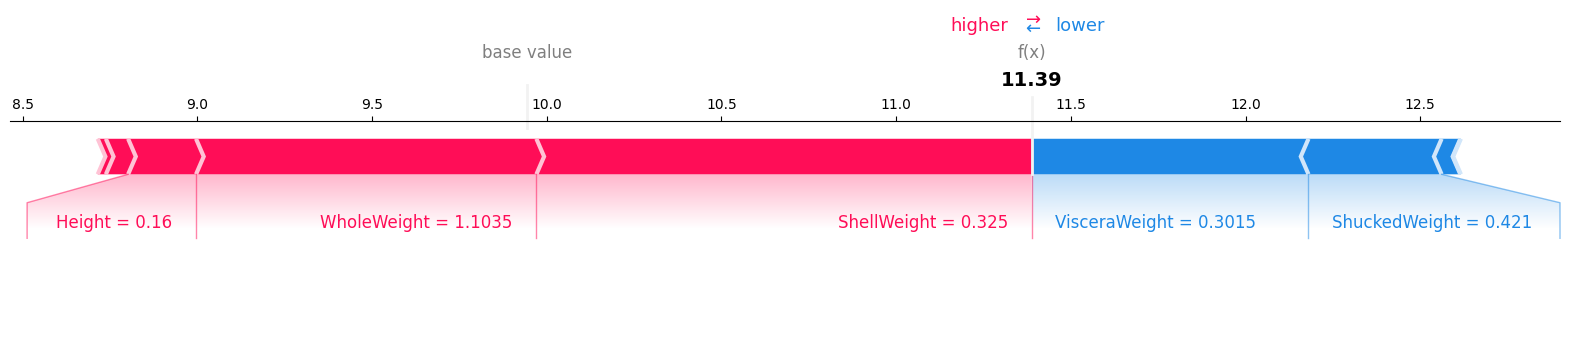

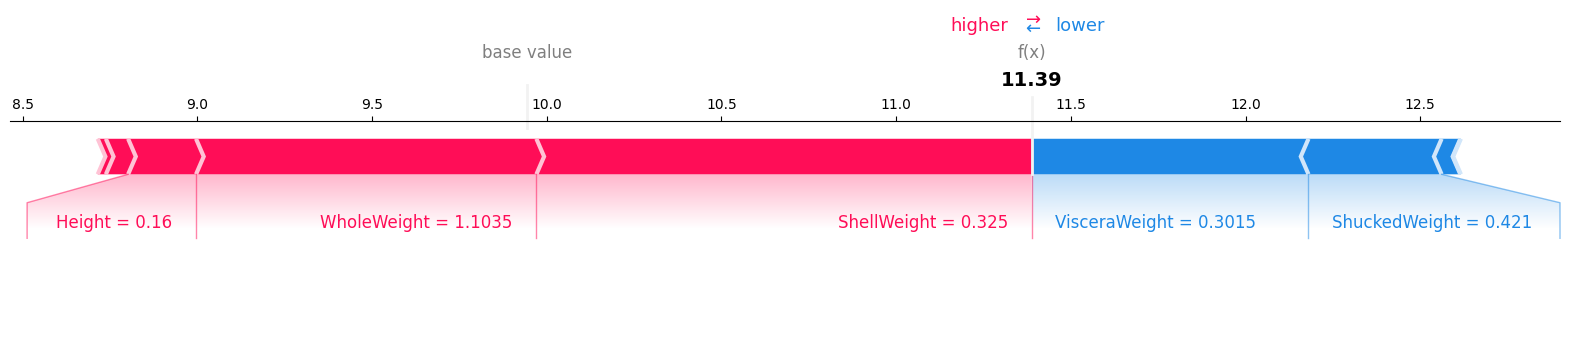

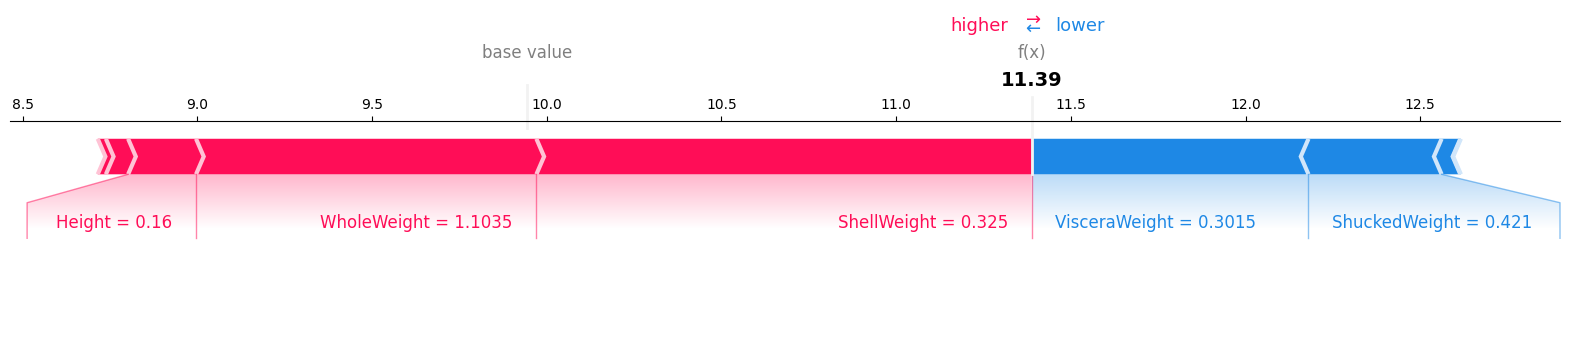

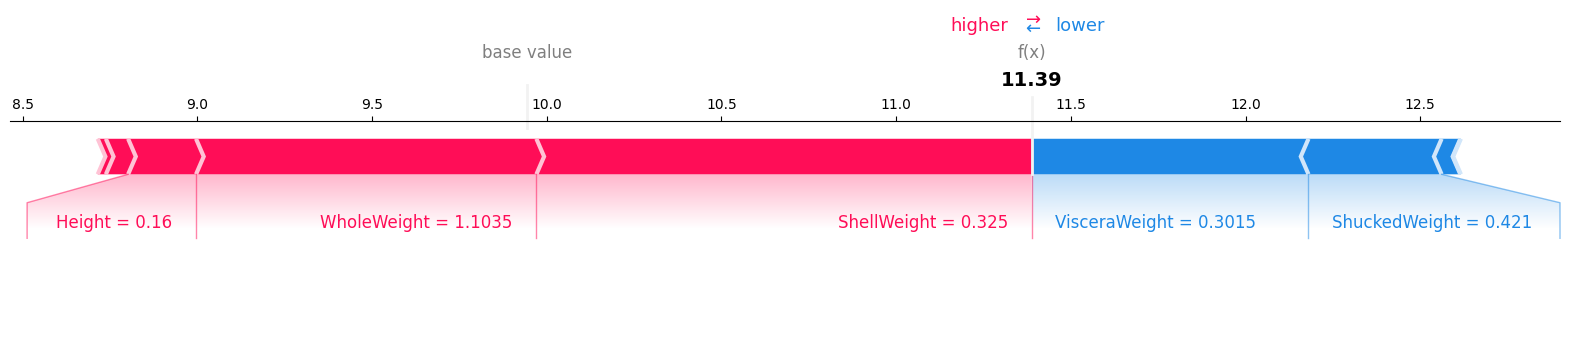

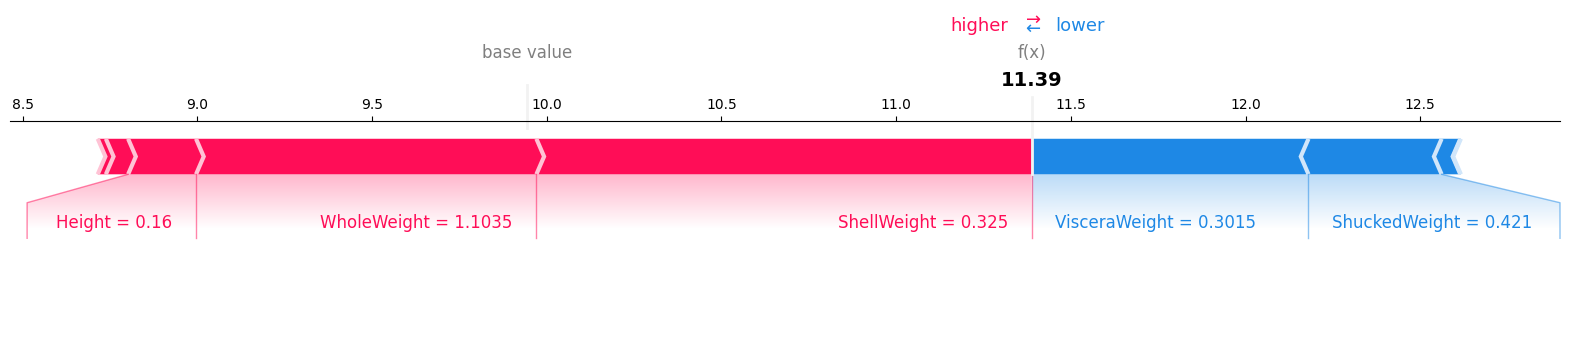

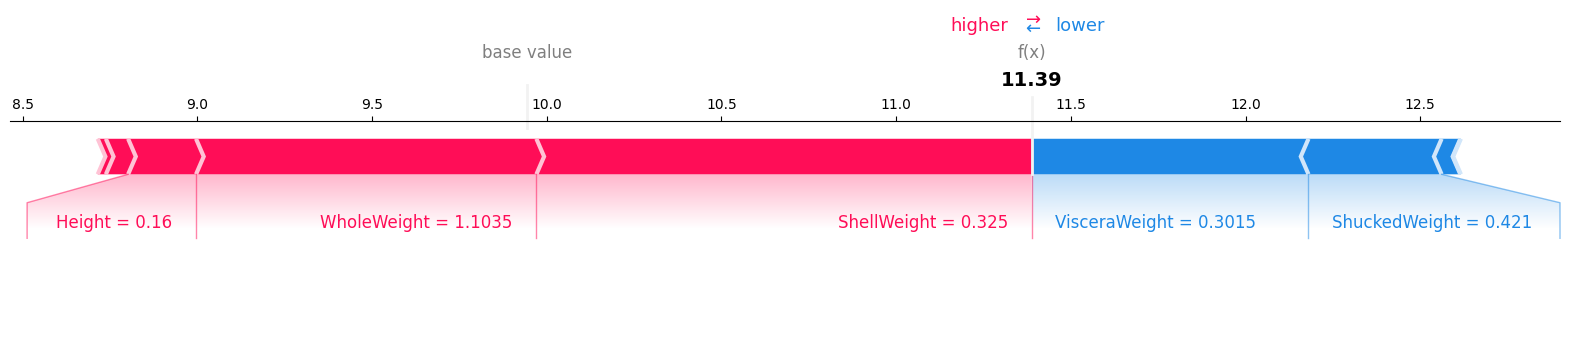

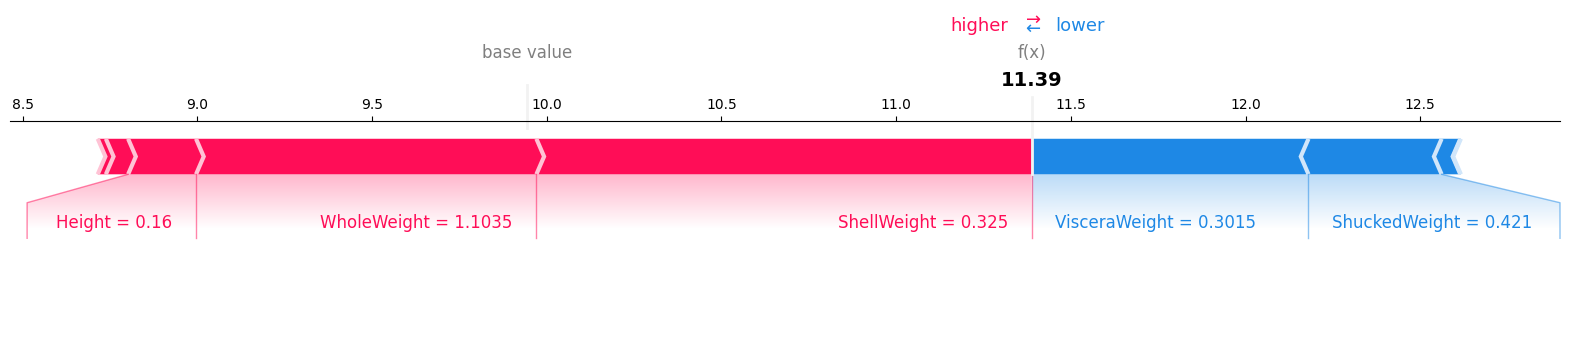

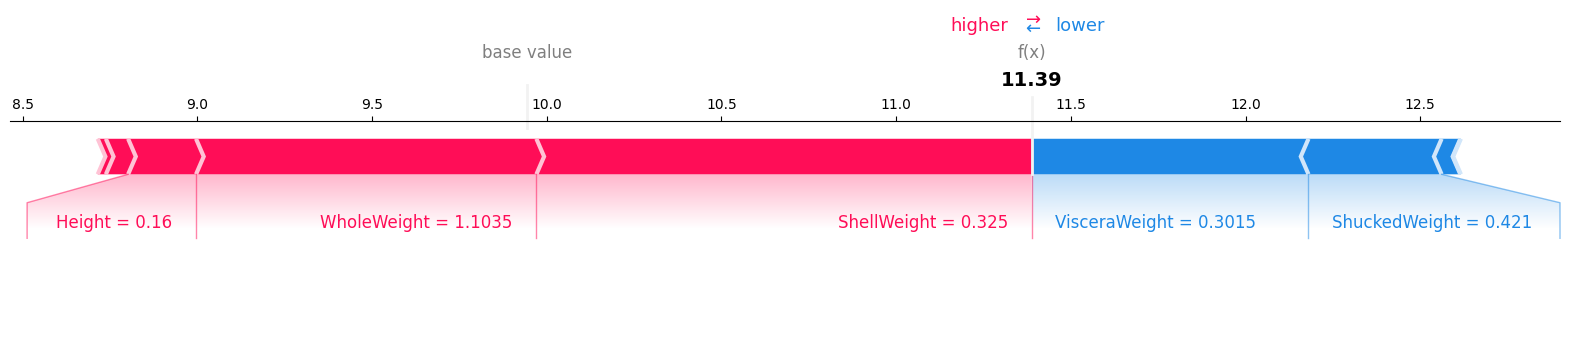

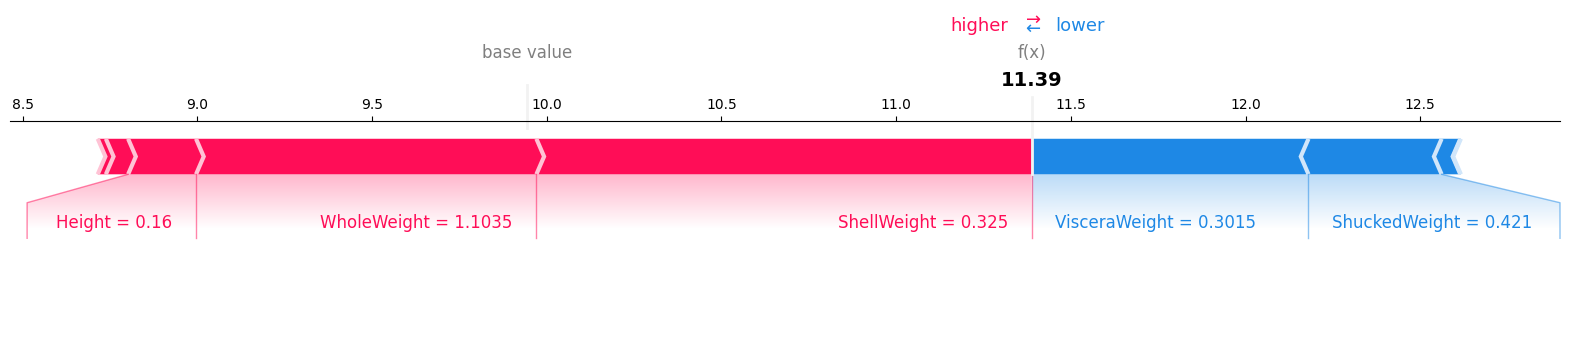

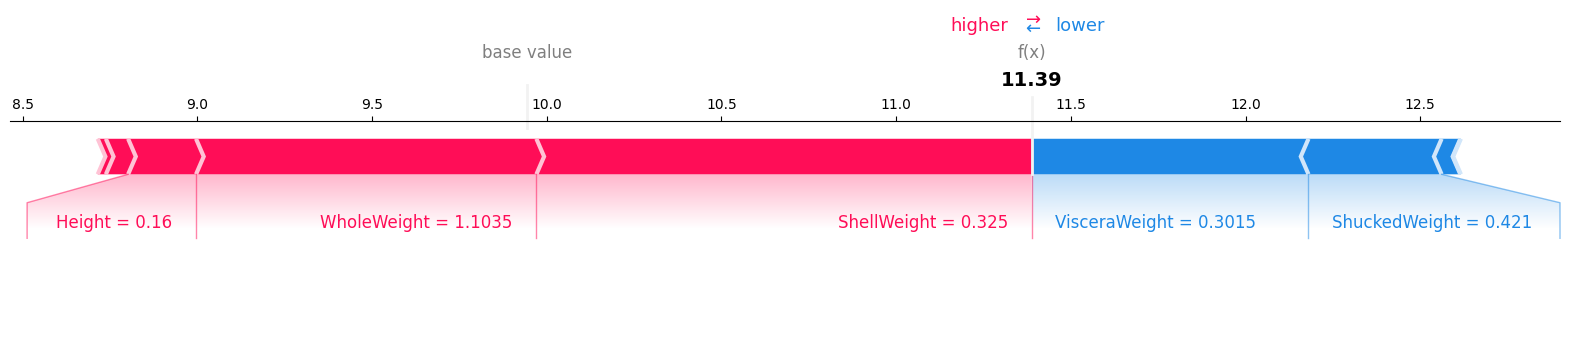

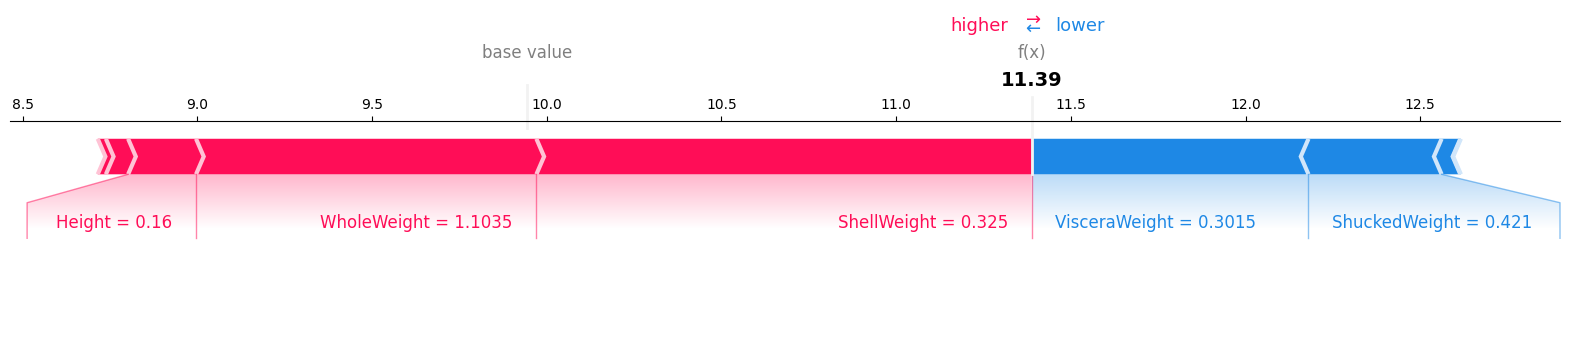

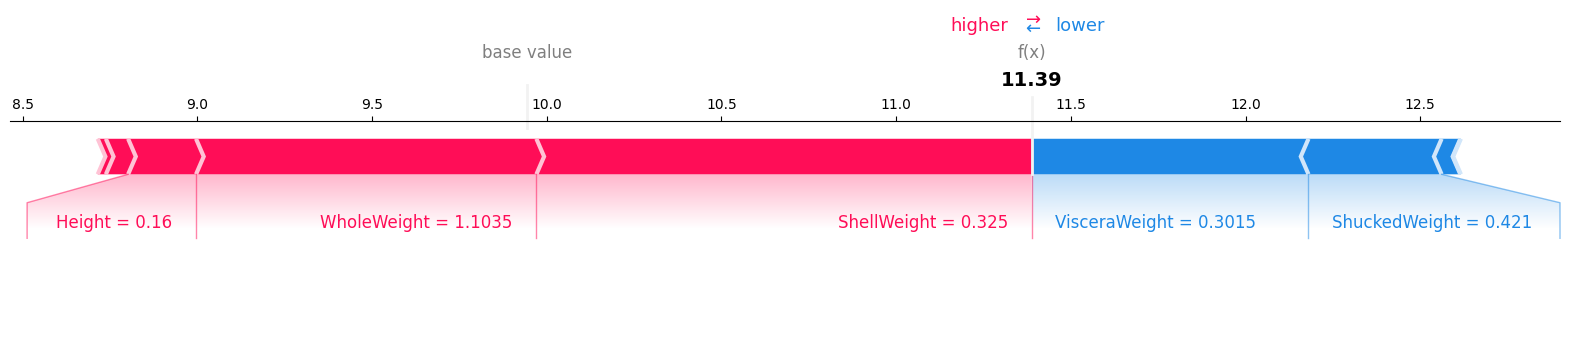

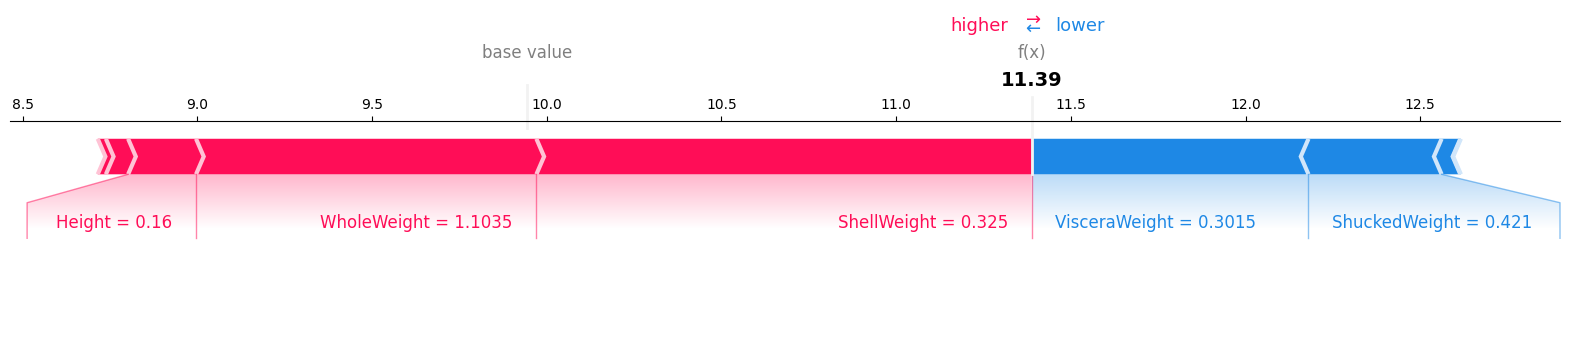

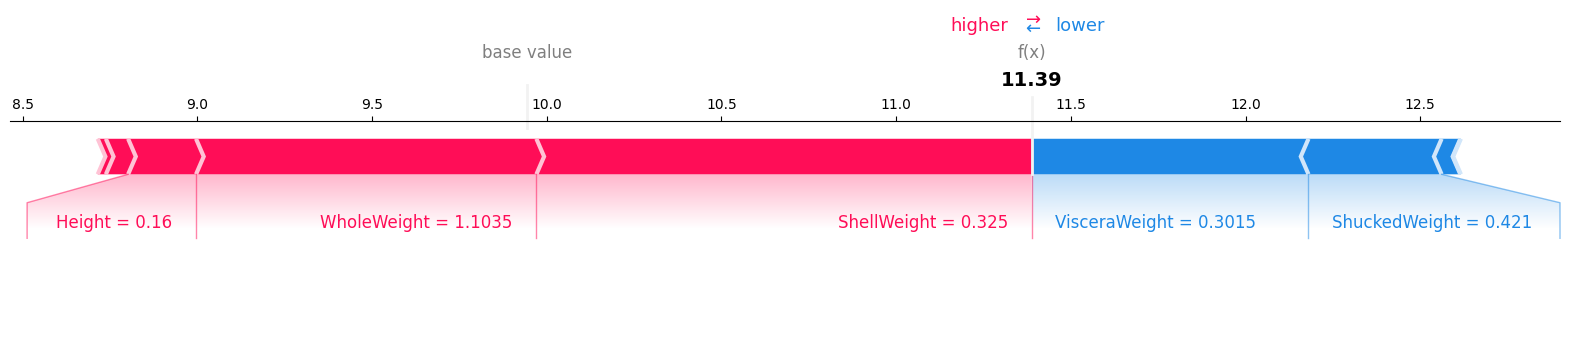

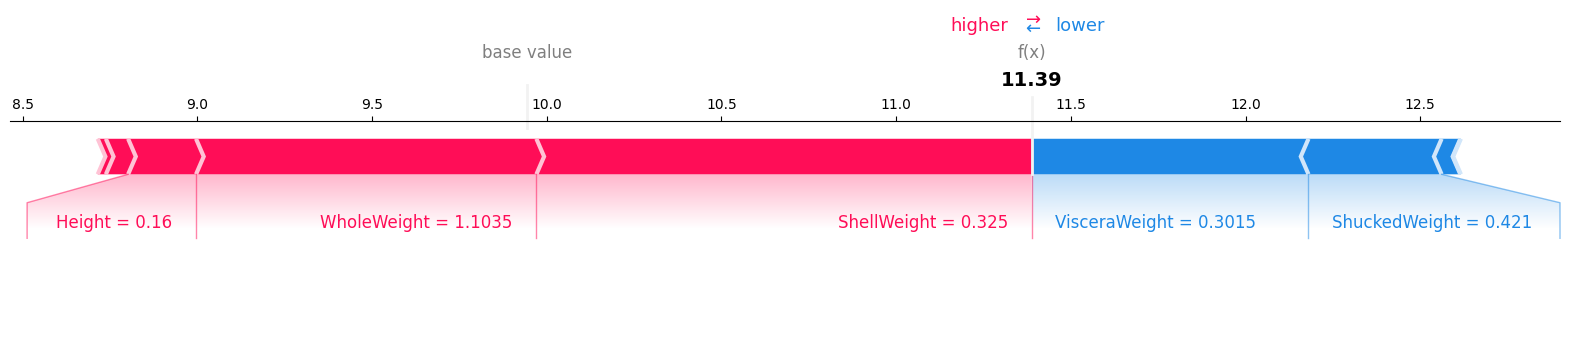

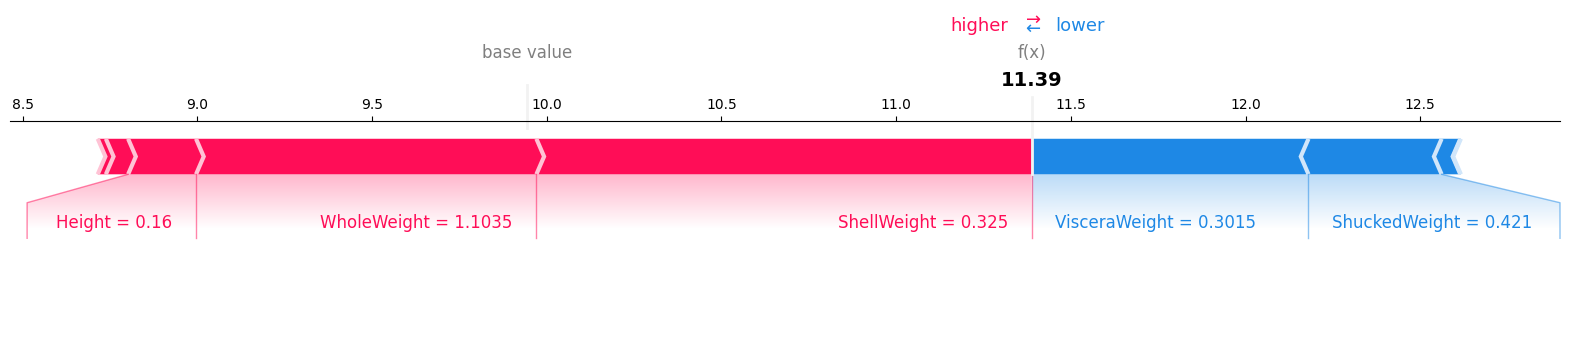

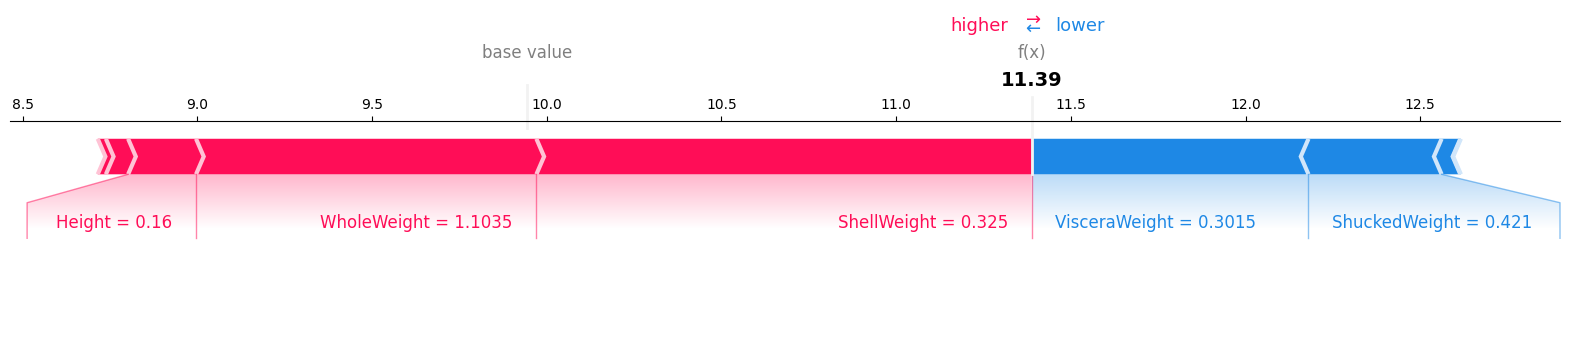

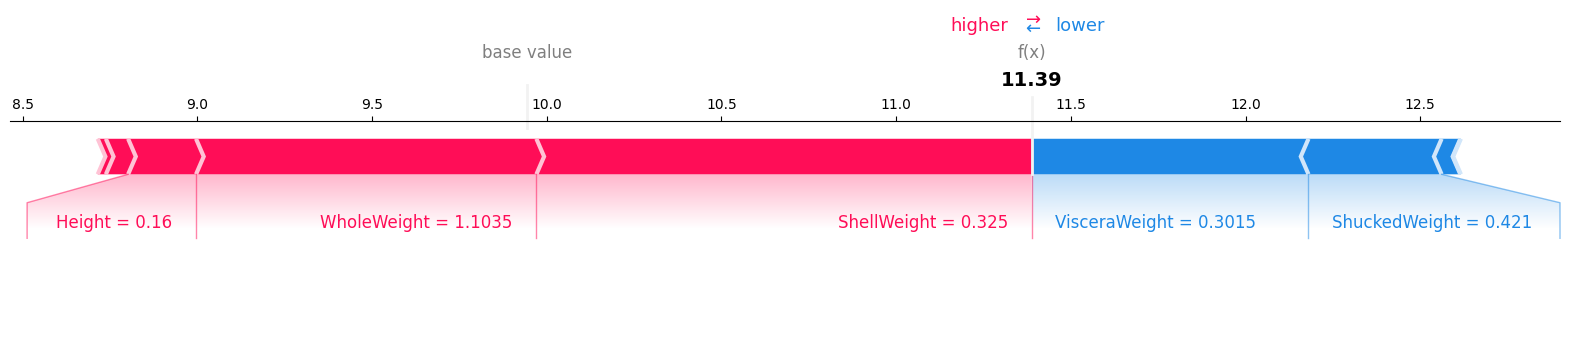

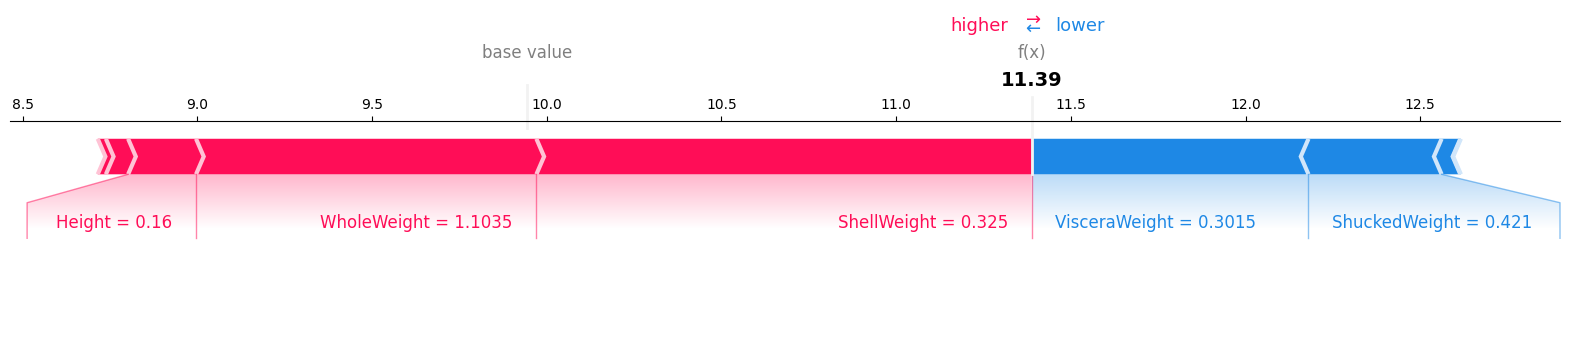

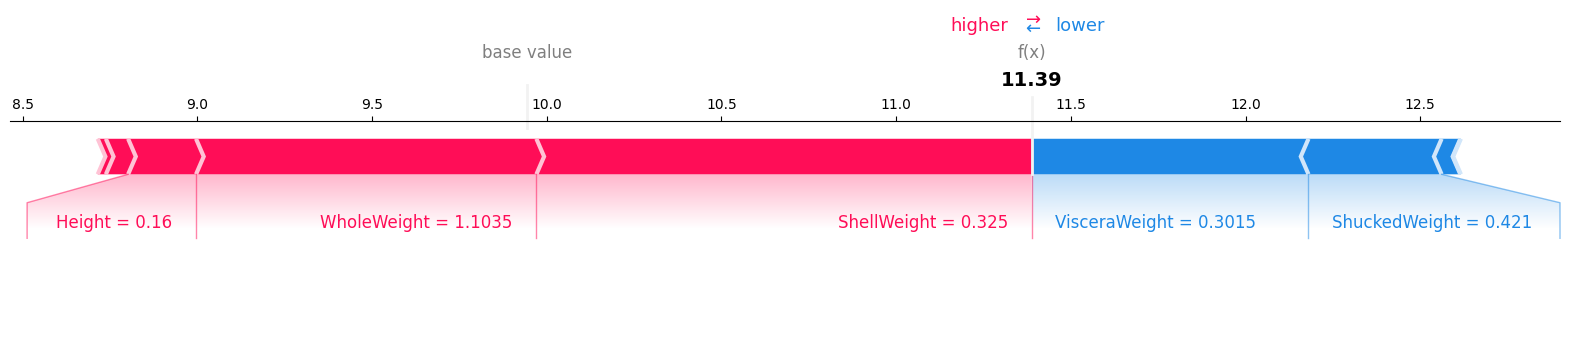

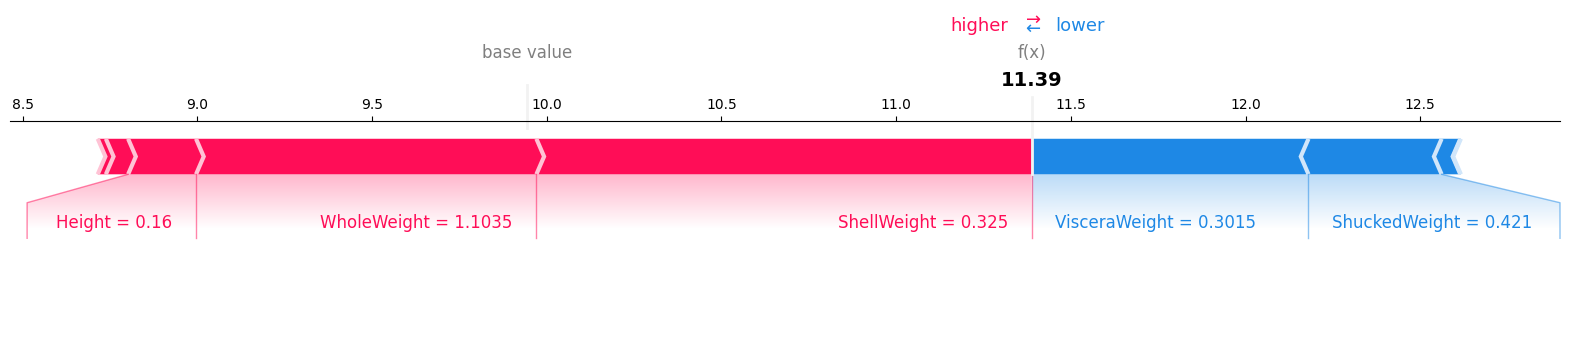

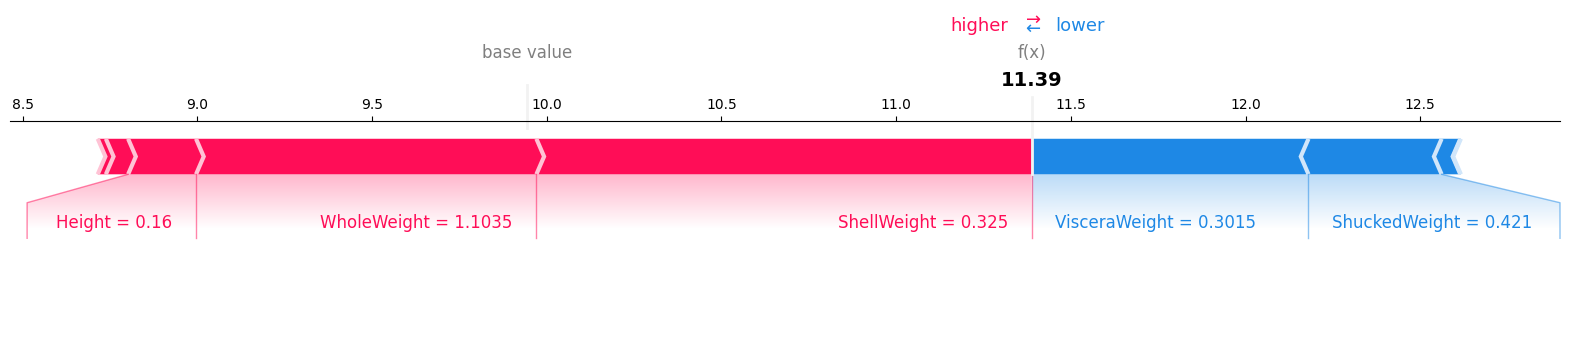

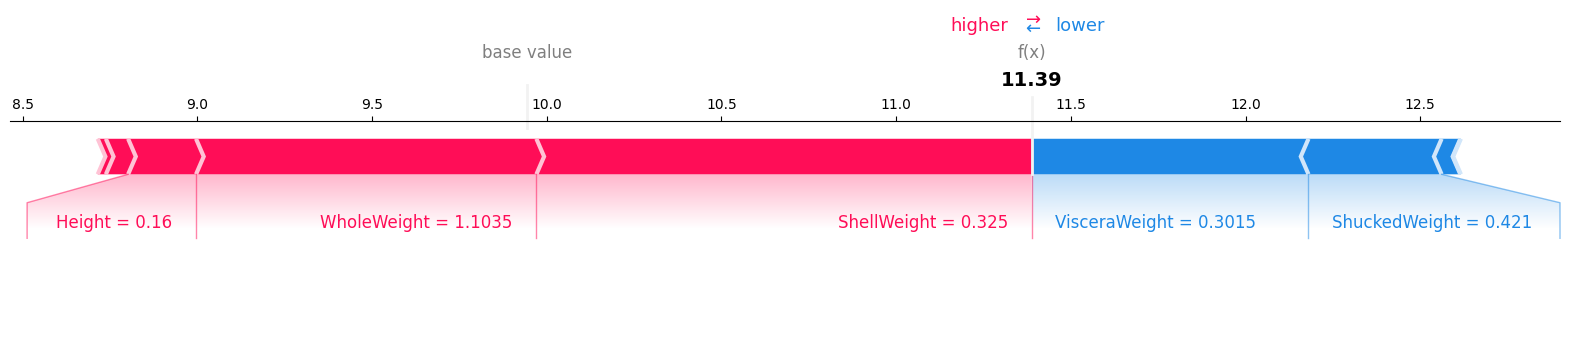

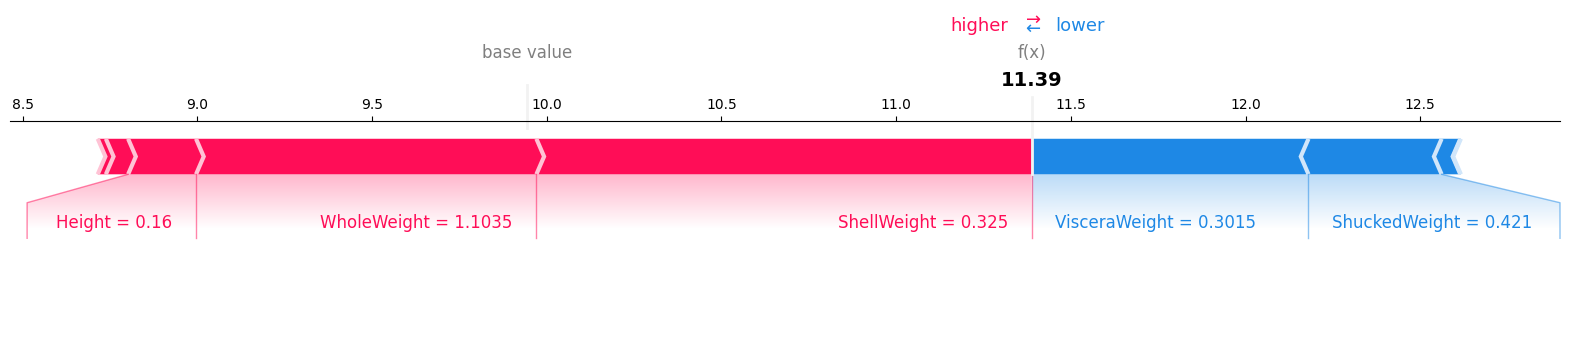

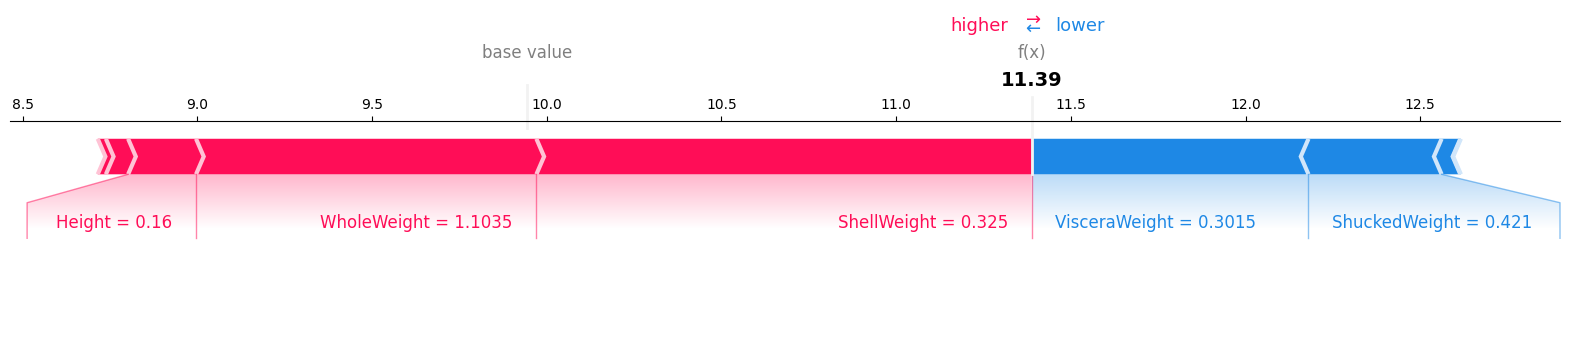

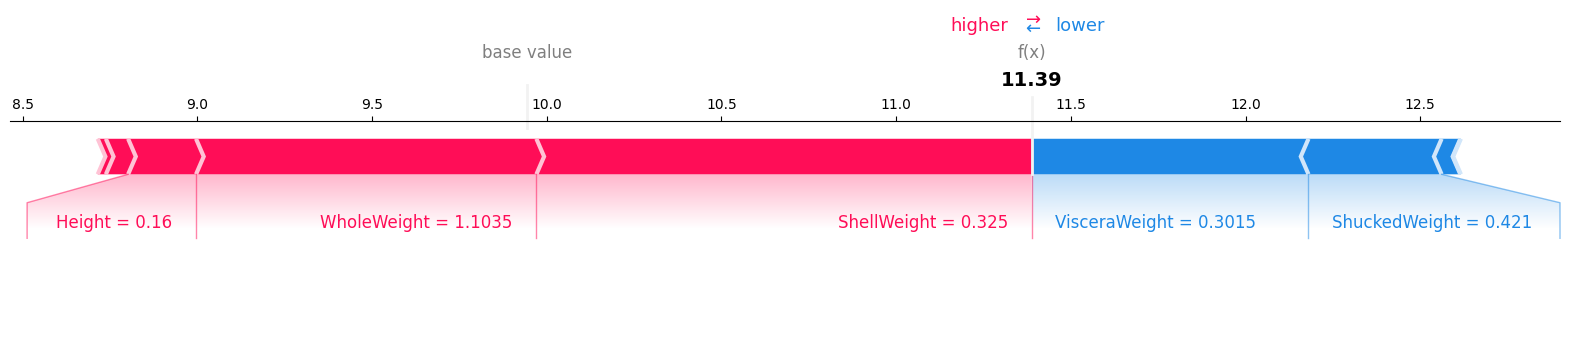

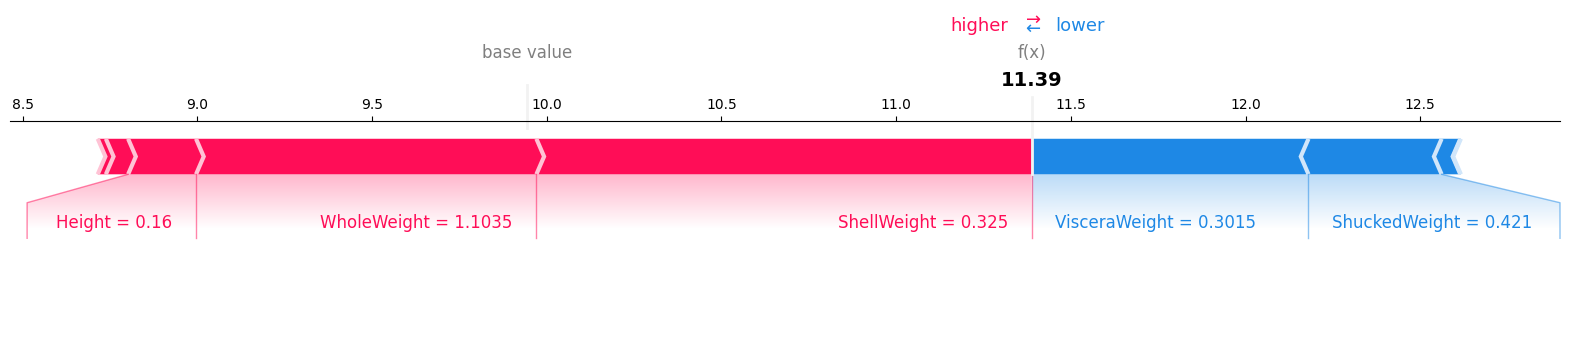

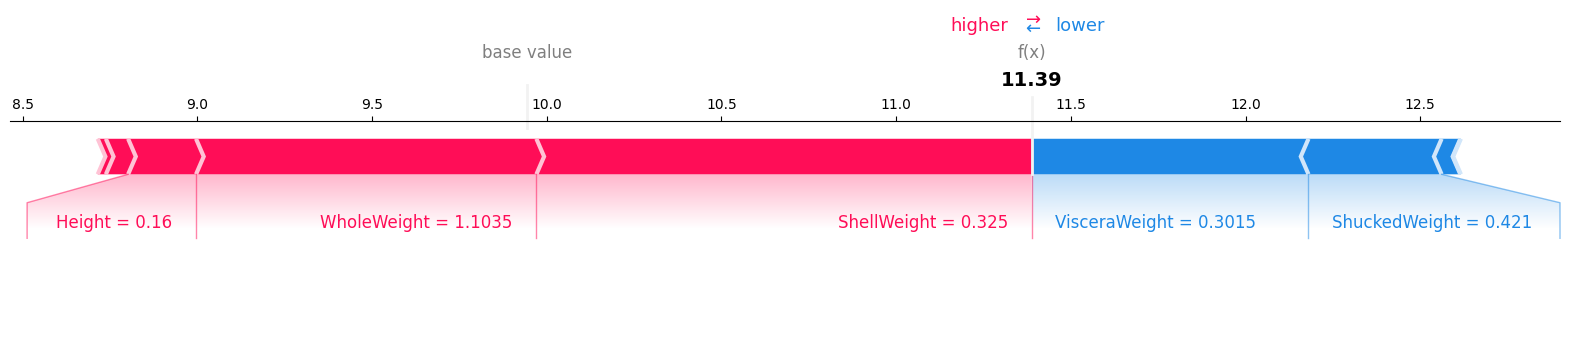

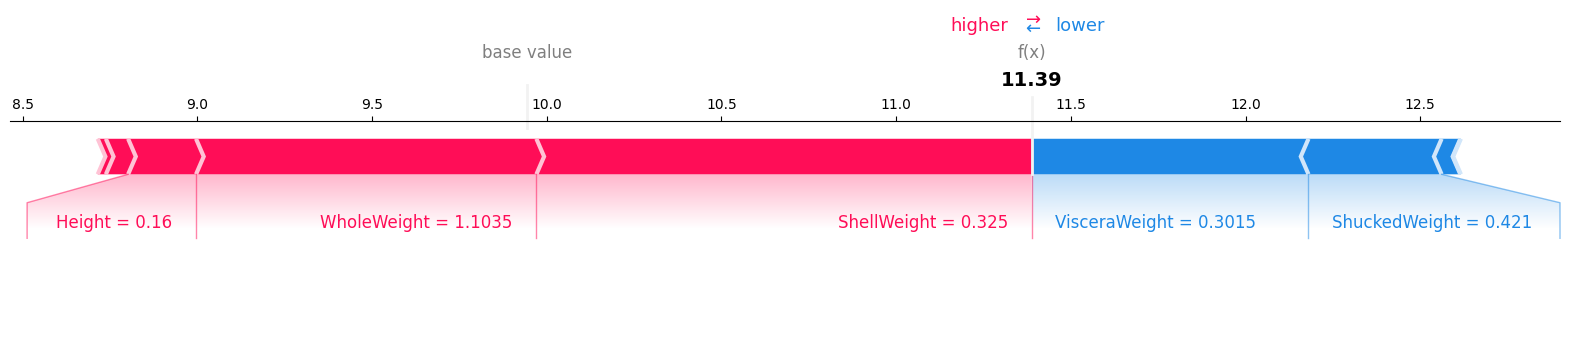

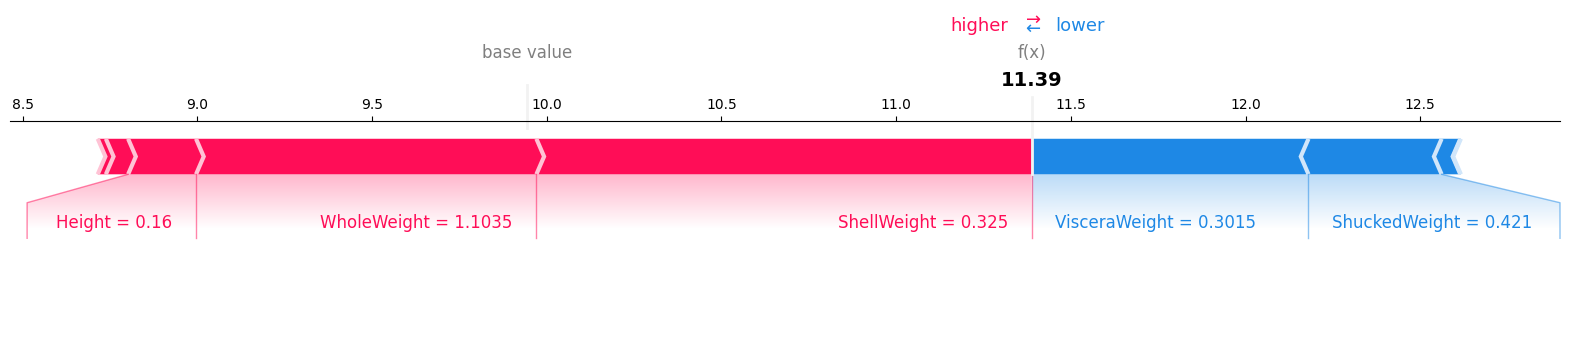

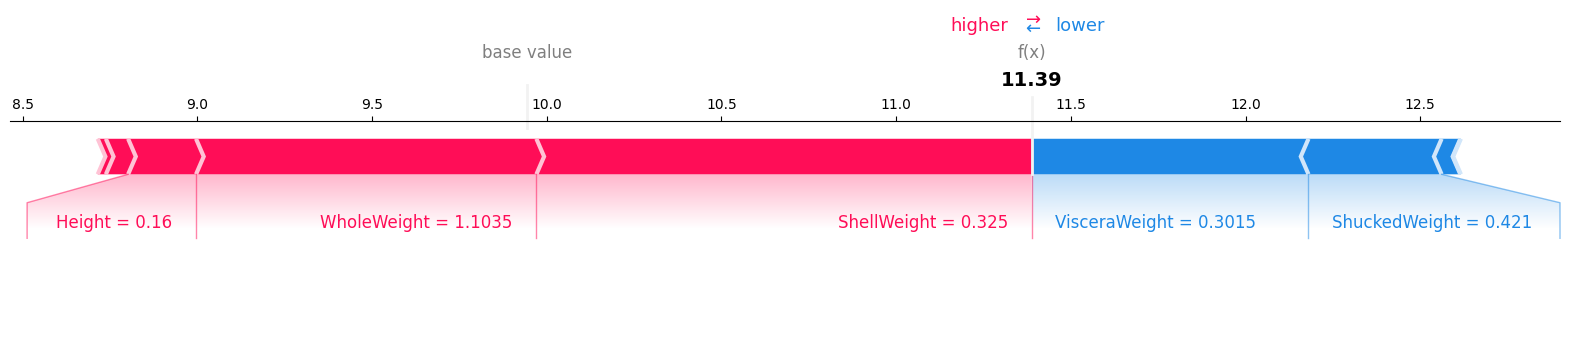

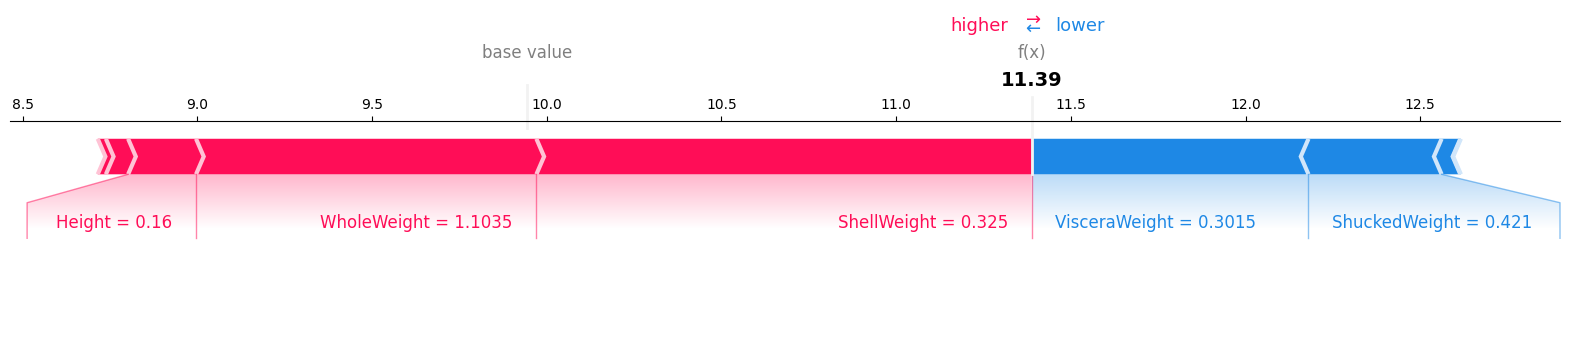

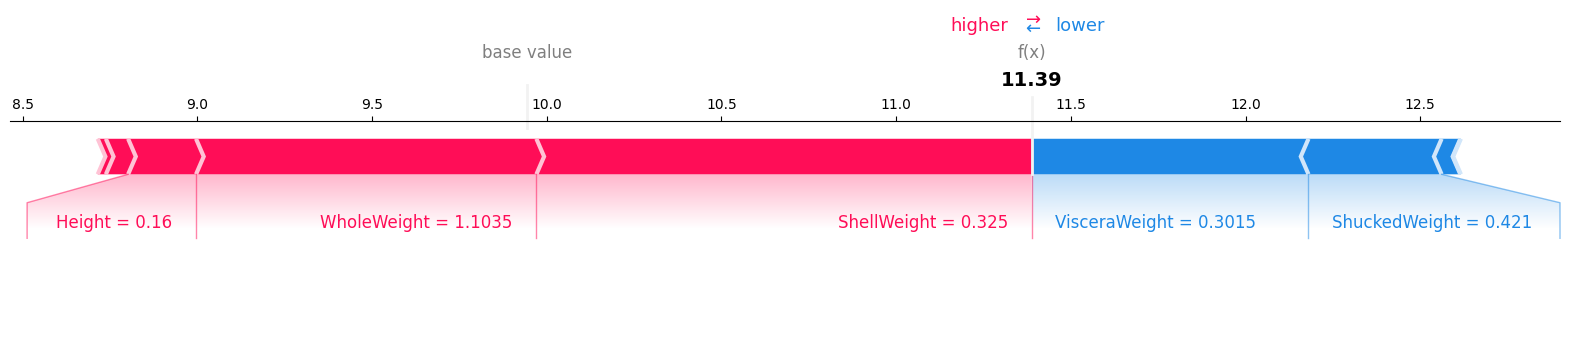

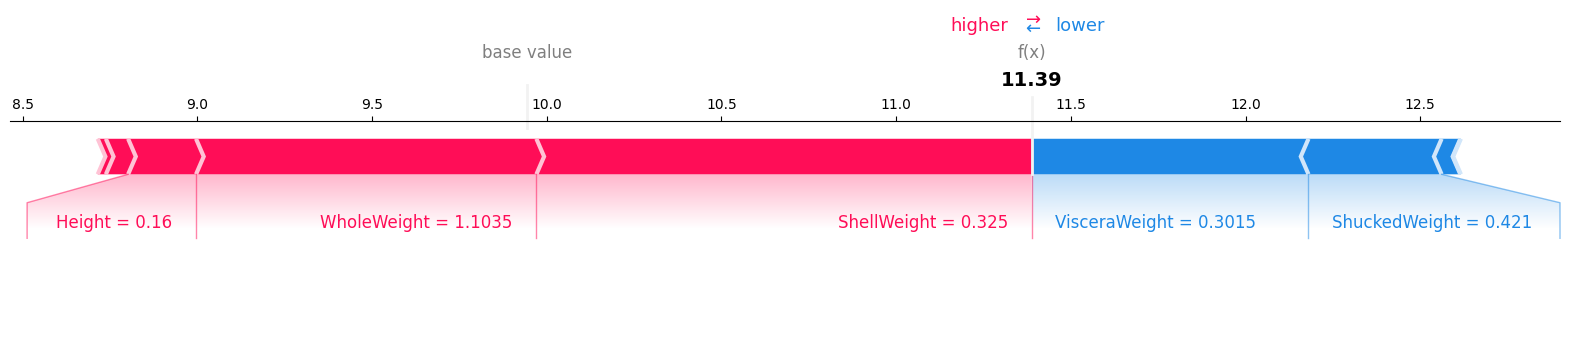

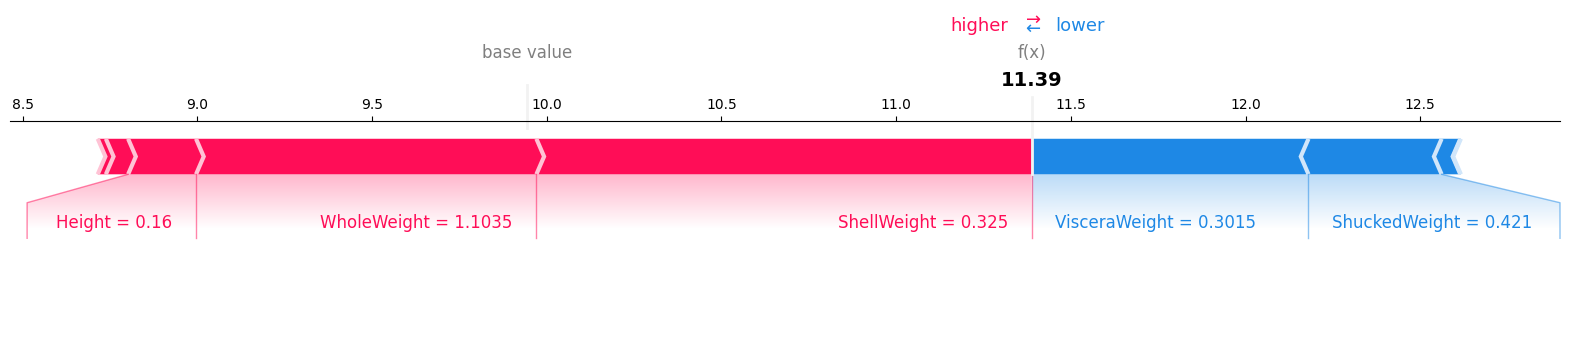

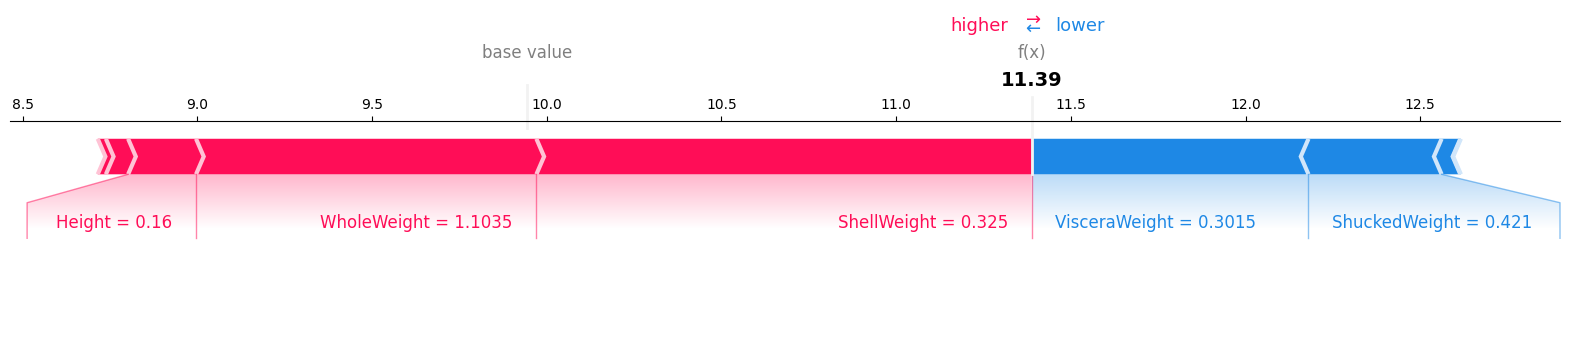

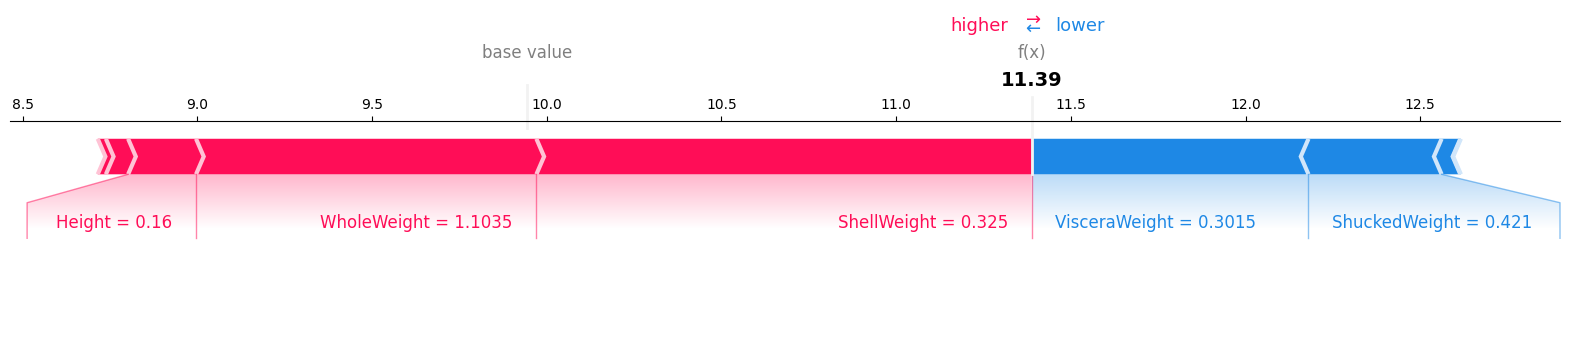

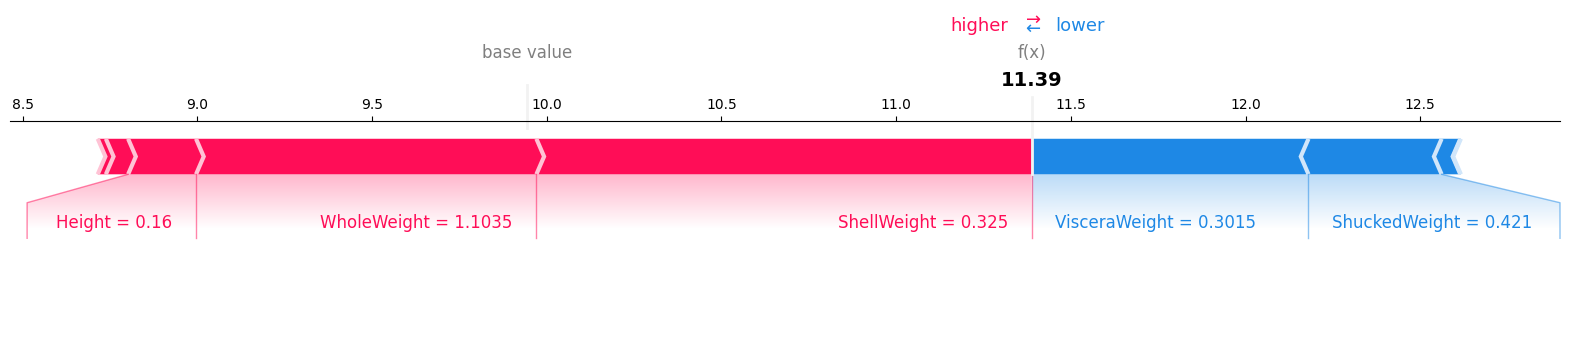

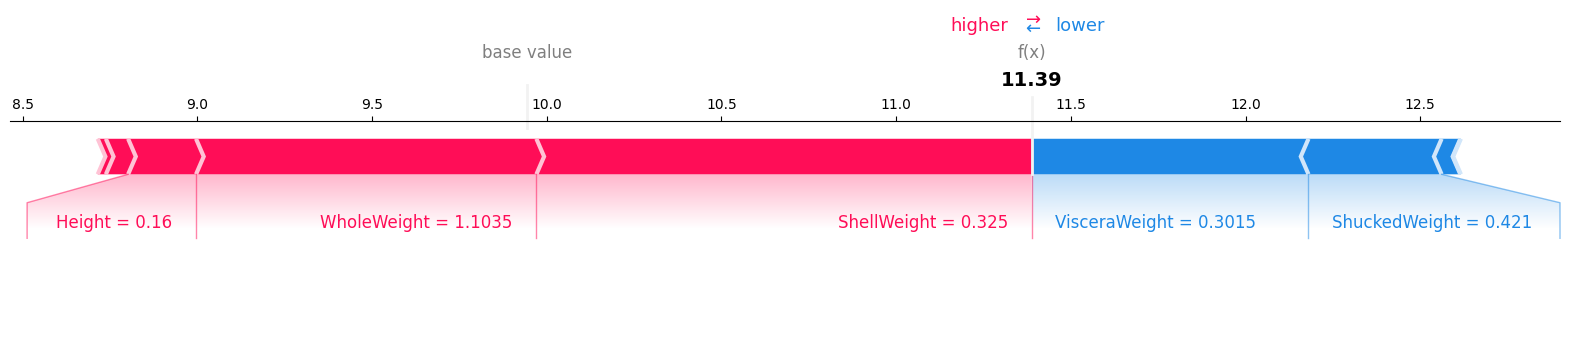

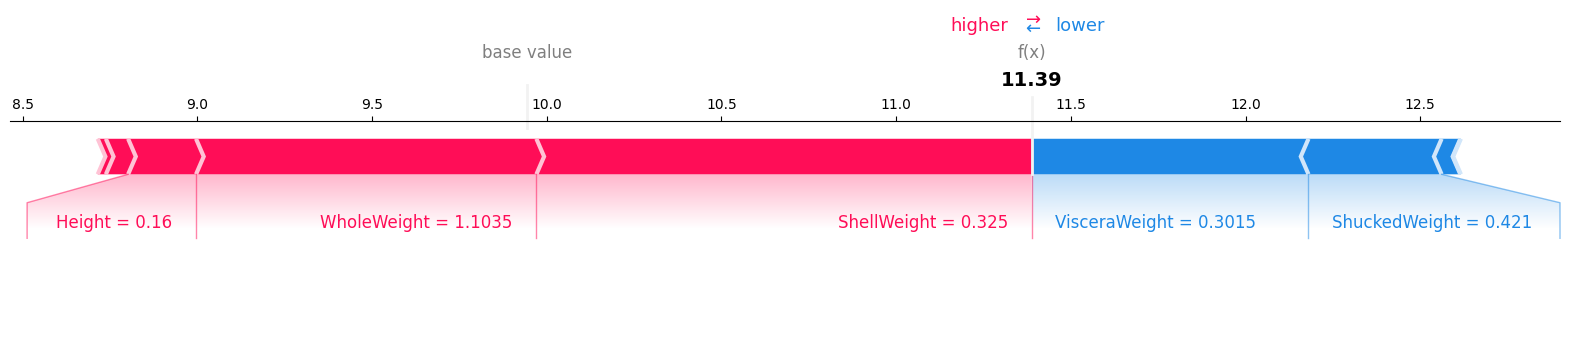

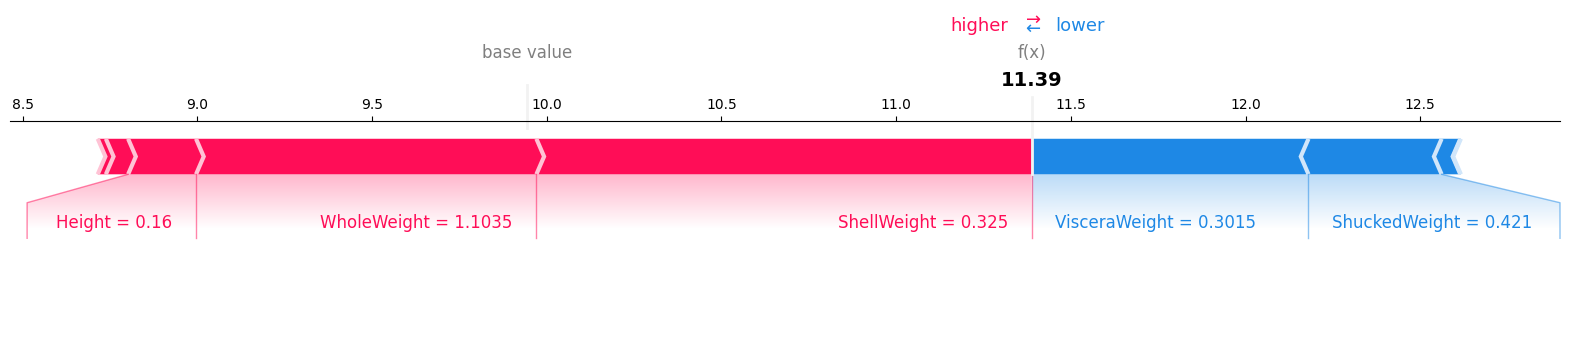

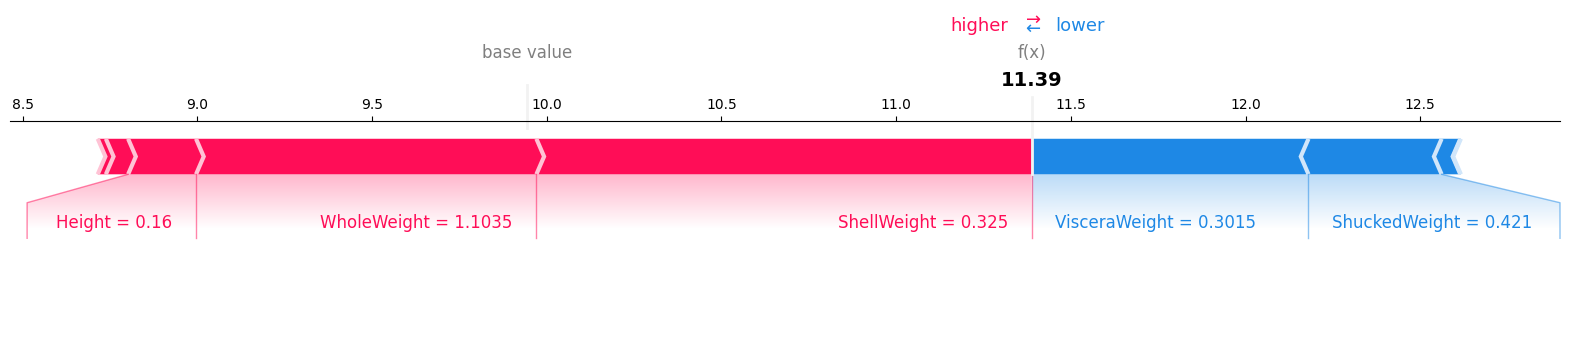

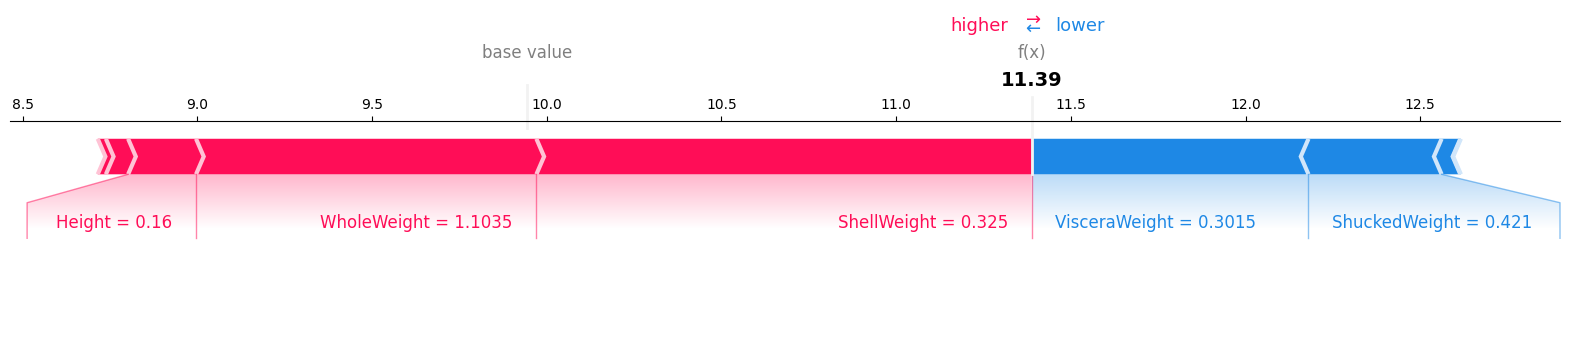

In [7]:
# If shap_values is an Explanation object, extract the values
if isinstance(shap_values, shap.Explanation):
	shap_values = shap_values.values

# Initialize the SHAP JavaScript library
shap.initjs()

# Visualize the first 100 observations
for i in range(100):
	shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0, :], matplotlib=True)



**Mean SHAP Plot:**
It Represents the mean absolute SHAP values for each feature across all predictions. It displays as a bar plot, indicating the average impact of each feature.

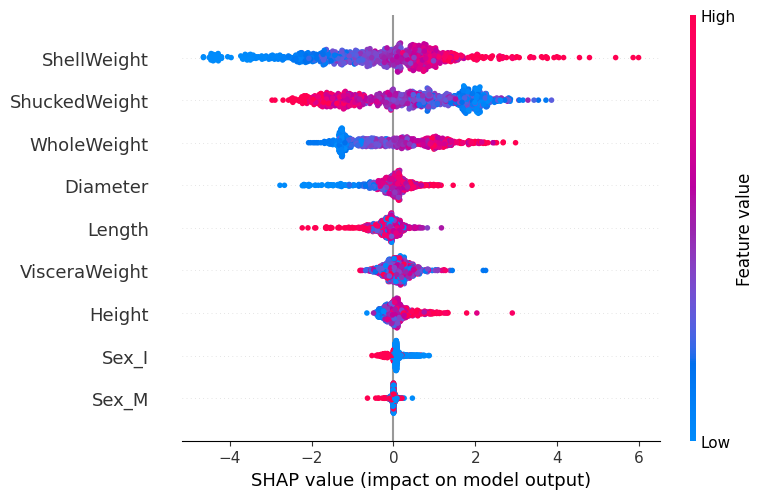

In [8]:
shap.summary_plot(shap_values, X_test)


**Beeswarm Plot:**
Beeswarm plot provides a detailed view of feature contributions for every prediction in the dataset. Each point represents a prediction, and the plot shows the distribution of feature contributions.

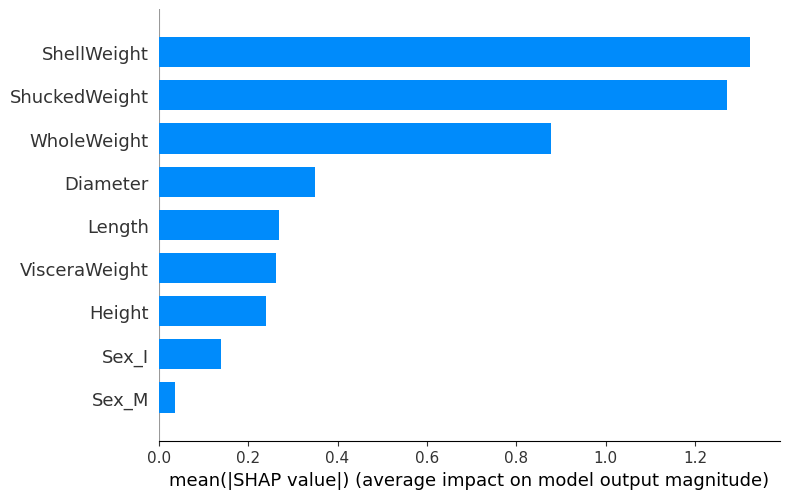

In [9]:
shap.summary_plot(shap_values, X_test, plot_type="bar")



**Color Coding:** Features are color-coded, and the plot reveals the spread of contributions for each feature.

**Dependence Plots:**
It shows how the SHAP value of a single feature changes based on the values of that feature across the whole dataset.

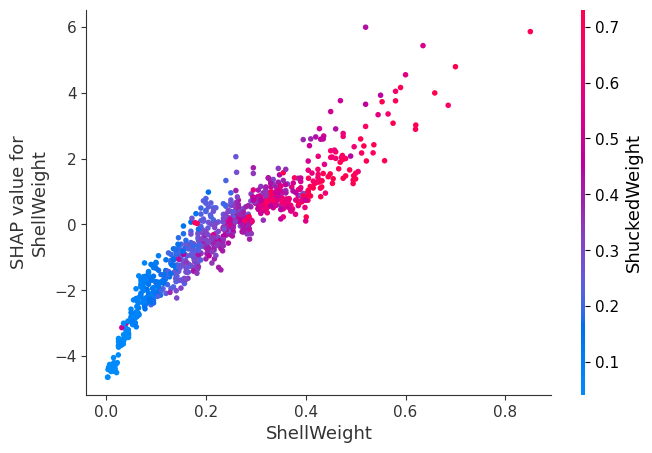

In [10]:
shap.dependence_plot("ShellWeight", shap_values, X_test)


**Feature Importance with SHAP:**
To understand machine learning models SHAP (SHapley Additive exPlanations) provides a comprehensive framework for interpreting the portion of each input feature in a model’s predictions.

**Shapley Values:**
SHAP allocates a shapely value to each category or feature based on the marginal contributions across all possible combinations.

**Individual Feature Contributions:**
SHAP provides a unique value to each feature to represent its impact on the model’s output. it gives a clear understanding of the contribution of each feature to a specific prediction.

**Quantifying Impact:**
SHAP assigns a unique number to each feature, it helps to measure how important that feature is in predicting outcomes.

**Interpretability Across Models:**
SHAP is model-agnostic, meaning it can be applied to various machine learning models, including tree-based models, linear models, neural networks, and more.
This helps in always understanding which features are important, no matter what kind of model is being used.

**Consistency in Summation:**
Adding up the SHAP values for a prediction is the same as finding the difference between the model’s prediction for that case and the average prediction for all cases.
This makes sure we can trust and rely on measuring how important each feature is.

**Visual Representation:**
SHAP values can be visually represented through plots such as waterfall plots, force plots, and beeswarm plots.
These visualizations help in intuitively grasping the relative contributions of each feature.

**Interpreting Black Box Models with SHAP:**

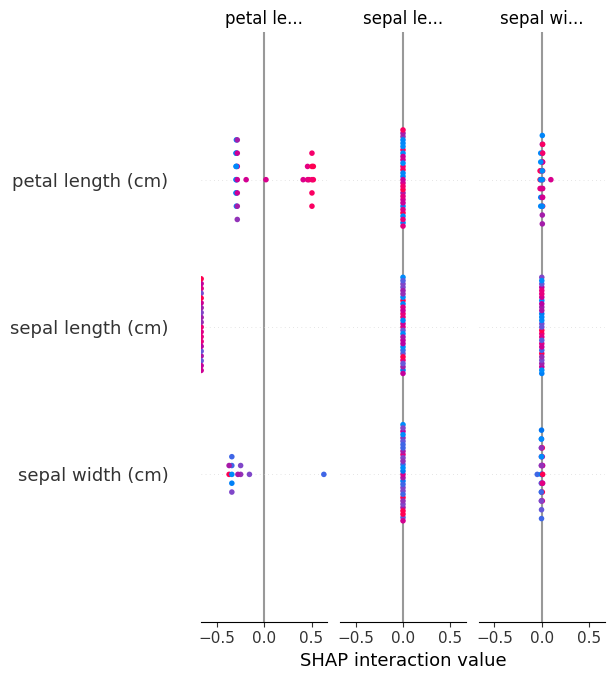

In [11]:
# Importing necessary packages
import xgboost as xgb
import shap
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Loading the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="Target")

# Data preprocessing and feature engineering
# Assuming no specific preprocessing is needed for this example

# Creating an XGBRegressor model for demonstration purposes
model = xgb.XGBRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# Creating a black box model (e.g., a simple decision tree)
from sklearn.tree import DecisionTreeClassifier

black_box_model = DecisionTreeClassifier(random_state=42)
black_box_model.fit(X_train, y_train)

# SHAP values for the black box model
explainer = shap.Explainer(black_box_model)
shap_values = explainer.shap_values(X_test)

# You can now use shap_values for interpretation and visualization
# Example: Plotting a summary plot
shap.summary_plot(shap_values, X_test)


# ***CONCLUSION***

**Applications of SHAP:**
Explain ability in Machine Learning Models: SHAP makes it easier to understand how complex machine models make decisions.
Feature Importance Analysis: It shows us which parts are more important for better understanding.

**Interpreting Black Box Models:** SHAP works with both straightforward and confusing models, making it simple to understand how they work.
Model Fairness Evaluation: SHAP can help us see if models are making fair decisions.

**Understanding Relationships Between Features:** SHAP helps us find connections between different features in a dataset.

**Risk Assessment Models:** SHAP can be applied in models that evaluate risks.

**Challenges of SHAP:**

**Computational Intensity:** SHAP might be slow with big sets of data.

**Model Dependency:** SHAP’s functioning can vary based on the type of model being employed.

**High-Dimensional Data Challenges:** SHAP face challenges when dealing with data that has many features.

**Model Training Overhead:** Using SHAP might require additional time for training the model.

**Sensitivity to Input Order:** The appearance of SHAP values can change depending on the order of the data.

In summary, SHAP is like a powerful tool that helps us see which parts of our data matter the most in making predictions. It works for different kinds of models and shows us clear pictures to make things easier to understand. This makes it really useful for people who want to trust and better understand their complicated models.

MIT License

Copyright (c) [2024] [Ramy Solanki]

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS," WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.